# Исследование  метрик сервиса Яндекс.Афиша

В целях корректировки рекламного бюджета проводится когортный анализ клиентов сервиса, расчет маркетинговых, продуктовых и метрик электронной коммерции в разрезе когорт

Исследование проводится на основании данных Яндекс.Афиши с июня 2017 по конец мая 2018 года (dataset: лог сервера с данными о посещениях сайта Яндекс.Афиши; заказы за этот период; статистика рекламных расходов).

### Оглавление <a name='step_0'></a>
[1. Загрузка и предобработка данных](#step_1)    
    [1.1. Данные о визитах на сайт/сервис](#step_1.1)  
    [1.2. Данные о заказах](#step_1.2)  
    [1.3. Данные о рекламных расходах](#step_1.3)  
[2. Расчет метрик](#step_2)  
    [ 2.1. Продуктовые метрики (на основании данных визитов)](#step_2.1)  
        [2.1.1. DAU, WAU, MAU  и их изменение во времениих](#step_2.1.1)  
            [2.1.1.1. DAU](#step_2.1.1.1)  
            [2.1.1.2. WAU](#step_2.1.1.2)  
            [2.1.1.3. MAU](#step_2.1.1.3)  
            [2.1.1.4. Графики изменение DAU, WAU и  MAU во времени](#step_2.1.1.4)  
        [Выводы  по 2.1.1.](#step_2.1.1v)  
        [2.1.2.  Количество заходов пользователей за день на сайт (среднее и изменение во времени)](#step_2.1.2)  
            [2.1.2.1.  На основании метрики DAU](#step_2.1.2.1)  
            [2.1.2.2.  Анализ на основании MAU](#step_2.1.2.2)  
            [2.1.2.3.  Анализ за весь период](#step_2.1.2.3)  
        [Выводы  по 2.1.2.](#step_2.1.2v)  
        [2.1.3.  Продолжительность сессии пользователей на сайте (ASL и распределение по пользователям)](#step_2.1.3)  
        [Выводы  по 2.1.3.](#step_2.1.3v)  
        [2.1.4.  Рассчет Retention Rate](#step_2.1.4)  
        [Выводы  по 2.1.4.](#step_2.1.4v)  
    [2.2.  Метрики электронной коммерции (на основании данных заказов)](#step_2.2)  
        [2.2.1.  Исследование среднего времени с момента первого посещения сайта до покупки](#step_2.2.1)  
        [Выводы по  2.2.1.](#step_2.2.1v)  
        [2.2.2.  Расчет среднего количества покупок на одного клиента за период](#step_2.2.2)  
        [Выводы по  2.2.2.](#step_2.2.2v)  
        [2.2.3.  Расчет средней выручки с пользователя (изучение динамики метрики во времени)](#step_2.2.3)  
            [2.2.3.1.  Расчет в рамках когорт](#step_2.2.3.1)  
            [2.2.3.2.  Без деления на когорты](#step_2.2.3.2)  
        [Выводы по  2.2.3.](#step_2.2.3v)  
        [2.2.4.  Анализ накопительного LTV по когортам во времени](#step_2.2.4)  
        [Выводы по  2.2.4.](#step_2.2.4v)  
    [2.3.  Маркетинговые метрики](#step_2.3)  
        [2.3.1. Общая сумма расходов на маркетинг,  распределение расходов по источникам,  изменение распределения во времени](#step_2.3.1)  
        [Выводы по  2.3.1.](#step_2.3.1v)  
        [2.3.2.  CAC](#step_2.3.2)  
        [Выводы по  2.3.2.](#step_2.3.2v)  
        [2.3.3.  ROMI по когортам в разрезе источников](#step_2.3.3)  
        [Выводы по  2.3.3.](#step_2.3.3v)  
        [2.3.4. Анализ заказов пользователей в разрезе устройств и платформ](#step_2.3.4)  
[Общие выводы по исследованию](#step_fin)

## 1. Загрузка и предобработка данных<a name='step_1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [2]:
df_v = pd.read_csv('visits_log.csv')
df_o = pd.read_csv('orders_log.csv')
df_c = pd.read_csv('costs.csv')

### 1.1. Данные о визитах на сайт/сервис<a name='step_1.1'></a>

In [3]:
df_v.head()

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [4]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
# определение уникальных типов устройств
device_list = df_v['Device'].unique().tolist()
device_list

['touch', 'desktop']

In [6]:
# проверка наличия полных дубликатов строк
df_v.duplicated().sum()

0

#### В данных о визитах требуется: 
* замена наименования столбцов (приведение к нижнему регистру и замена пробелов на нижнее подчеркивание);  
* преобразование типа столбцов `End Ts` и `Start Ts` к типу `datetime`.

In [7]:
df_v.columns =[col.lower().replace(' ', '_') for col in df_v.columns.to_list()]
df_v['end_ts'] = pd.to_datetime(df_v['end_ts'])
df_v['start_ts'] = pd.to_datetime(df_v['start_ts'])
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [8]:
# проверка диапазона дат (01.06.2017 - 31.05.2018 гг)
df_v['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

### 1.2. Данные о заказах<a name='step_1.2'></a>

In [9]:
df_o.head()

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [10]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
# проверка наличия полных дубликатов строк
df_o.duplicated().sum()

0

#### В данных о заказах требуется: 
* замена наименования столбцов (приведение к нижнему регистру и замена пробелов на нижнее подчеркивание);  
* преобразование типа столбца `Buy Ts` к типу `datetime`.

In [12]:
df_o.columns =[col.lower().replace(' ', '_') for col in df_o.columns.to_list()]
df_o['buy_ts'] = pd.to_datetime(df_o['buy_ts'])
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [13]:
# проверка диапазона дат (01.06.2017 - 31.05.2018 гг)
df_o['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [14]:
# исключение строк с датой больше или равно 2018-06-01 00:00:00
df_o = df_o[df_o['buy_ts'] < '2018-06-01 00:00:00']
df_o['buy_ts'].describe()

count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

### 1.3. Данные о рекламных расходах<a name='step_1.3'></a>

In [15]:
df_c.head()

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

In [16]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [17]:
df_c.duplicated().sum()

0

#### В данных о рекламных расходах: 
* преобразование типа столбца `dt` к типу `datetime`.

In [18]:
df_c['dt'] = pd.to_datetime(df_c['dt'])
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [19]:
# проверка диапазона дат (01.06.2017 - 31.05.2018 гг)
df_c['dt'].describe()

count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

## 2. Расчет метрик<a name='step_2'></a>

### 2.1. Продуктовые метрики (на основании данных визитов)<a name='step_2.1'></a>

In [20]:
df_v.head(1)

device              end_ts  source_id            start_ts  \
0  touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   

                    uid  
0  16879256277535980062

In [21]:
# добавление столбцов, соответвующих году, месяцу, недели, дню начала сессии пользователя
df_v['ses_m'] = df_v['start_ts'].dt.strftime('%Y-%m')
df_v['ses_w'] = df_v['start_ts'].dt.strftime('%y%W')
df_v['ses_d'] = df_v['start_ts'].dt.date
df_v['ses_m_dt'] = df_v['start_ts'].astype('datetime64[M]')
df_v.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid    ses_m ses_w       ses_d   ses_m_dt  
0  16879256277535980062  2017-12  1751  2017-12-20 2017-12-01  
1    104060357244891740  2018-02  1808  2018-02-19 2018-02-01  
2   7459035603376831527  2017-07  1726  2017-07-01 2017-07-01  
3  16174680259334210214  2018-05  1820  2018-05-20 2018-05-01  
4   9969694820036681168  2017-12  1752  2017-12-27 2017-12-01

#### 2.1.1. DAU, WAU, MAU  и их изменение во времении<a name='step_2.1.1'></a>

##### 2.1.1.1. DAU<a name='step_2.1.1.1'></a>

In [22]:
dau_all = df_v.groupby('ses_d').agg({'uid': ['count','nunique']}).reset_index()
dau_touch = df_v[df_v['device'] == 'touch'].groupby('ses_d').agg({'uid': ['count','nunique']}).reset_index()
dau_desktop = df_v[df_v['device'] == 'desktop'].groupby('ses_d').agg({'uid': ['count','nunique']}).reset_index()
dau_all.columns = ['ses_d', 'count_ses','count_un_users']
dau_touch.columns = ['ses_d', 'count_ses','count_un_users']
dau_desktop.columns = ['ses_d', 'count_ses','count_un_users']

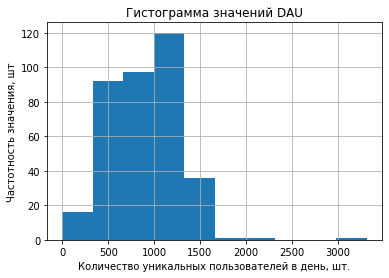

In [23]:
dau_all['count_un_users'].hist()
plt.title('Гистограмма значений DAU')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Количество уникальных пользователей в день, шт.')
plt.show()

In [24]:
dau_all['count_un_users'].describe()

count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: count_un_users, dtype: float64

In [25]:
# среднее значение и медиана имеют сопоставимые значения - в качестве "среднего" будем использовать среднее значение
dau_mean = int(round(dau_all['count_un_users'].mean(), 0))
dau_mean

908

##### 2.1.1.2. WAU<a name='step_2.1.1.2'></a>

In [26]:
wau_all = df_v.groupby('ses_w').agg({'uid': 'nunique'}).reset_index()
wau_touch = df_v[df_v['device'] == 'touch'].groupby('ses_w').agg({'uid': 'nunique'}).reset_index()
wau_desktop = df_v[df_v['device'] == 'desktop'].groupby('ses_w').agg({'uid': 'nunique'}).reset_index()
wau_touch.columns = ['ses_w','count_un_users']
wau_all.columns = ['ses_w','count_un_users']
wau_desktop.columns = ['ses_w','count_un_users']

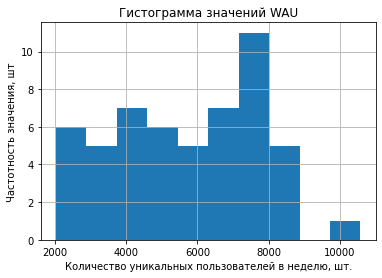

In [27]:
wau_all['count_un_users'].hist()
plt.title('Гистограмма значений WAU')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Количество уникальных пользователей в неделю, шт.')
plt.show()

In [28]:
wau_all['count_un_users'].describe()

count       53.000000
mean      5716.245283
std       2049.898027
min       2021.000000
25%       4128.000000
50%       5740.000000
75%       7401.000000
max      10586.000000
Name: count_un_users, dtype: float64

In [29]:
# среднее значение и медиана имеют сопоставимые значения  - в качестве "среднего" будем использовать среднее значение
wau_mean = int(round(wau_all['count_un_users'].mean(), 0))
wau_mean

5716

##### 2.1.1.3. MAU<a name='step_2.1.1.3'></a>

In [30]:
mau_all = df_v.groupby('ses_m').agg({'uid': ['count','nunique']}).reset_index()
mau_touch = df_v[df_v['device'] == 'touch'].groupby('ses_m').agg({'uid': ['count','nunique']}).reset_index()
mau_desktop = df_v[df_v['device'] == 'desktop'].groupby('ses_m').agg({'uid': ['count','nunique']}).reset_index()
mau_all.columns = ['ses_m', 'count_ses', 'count_un_users']
mau_touch.columns = ['ses_m', 'count_ses', 'count_un_users']
mau_desktop.columns = ['ses_m', 'count_ses', 'count_un_users']

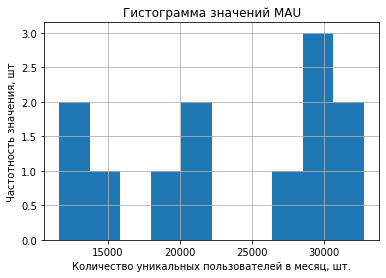

In [31]:
mau_all['count_un_users'].hist()
plt.title('Гистограмма значений MAU')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Количество уникальных пользователей в месяц, шт.')
plt.show()

In [32]:
mau_all['count_un_users'].describe()

count       12.000000
mean     23228.416667
std       7546.380462
min      11631.000000
25%      17777.000000
50%      24240.500000
75%      28984.750000
max      32797.000000
Name: count_un_users, dtype: float64

In [33]:
# среднее значение и медиана имеют сопоставимые значения  - в качестве "среднего" будем использовать среднее значение
mau_mean = int(round(mau_all['count_un_users'].mean(), 0))
mau_mean

23228

##### 2.1.1.4.  Графики изменение DAU, WAU и  MAU во времени <a name='step_2.1.1.4'></a>

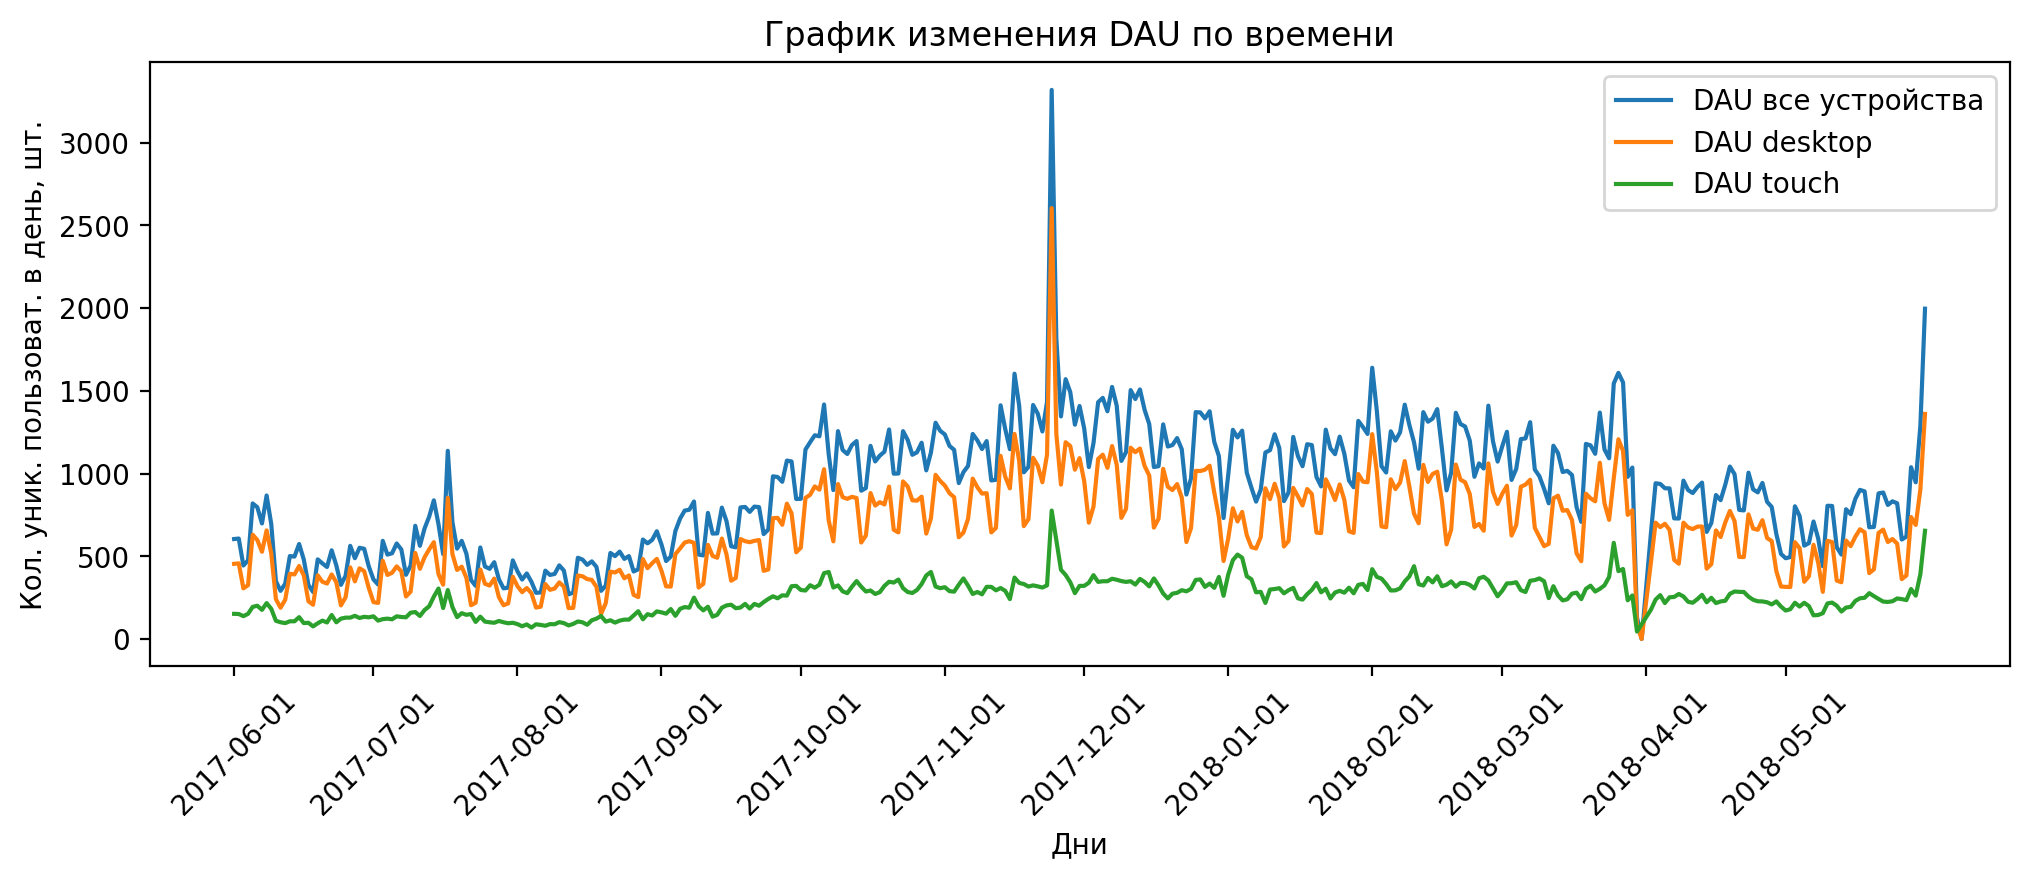

In [34]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x='ses_d', y='count_un_users', data=dau_all, label='DAU все устройства')
sns.lineplot(x='ses_d', y='count_un_users', data=dau_desktop, label='DAU desktop')
sns.lineplot(x='ses_d', y='count_un_users', data=dau_touch, label='DAU touch')
plt.title('График изменения DAU по времени')
plt.xlabel('Дни')
plt.ylabel('Кол. уник. пользоват. в день, шт.')
plt.xticks(ticks=mau_all['ses_m'], rotation=45)
plt.show()

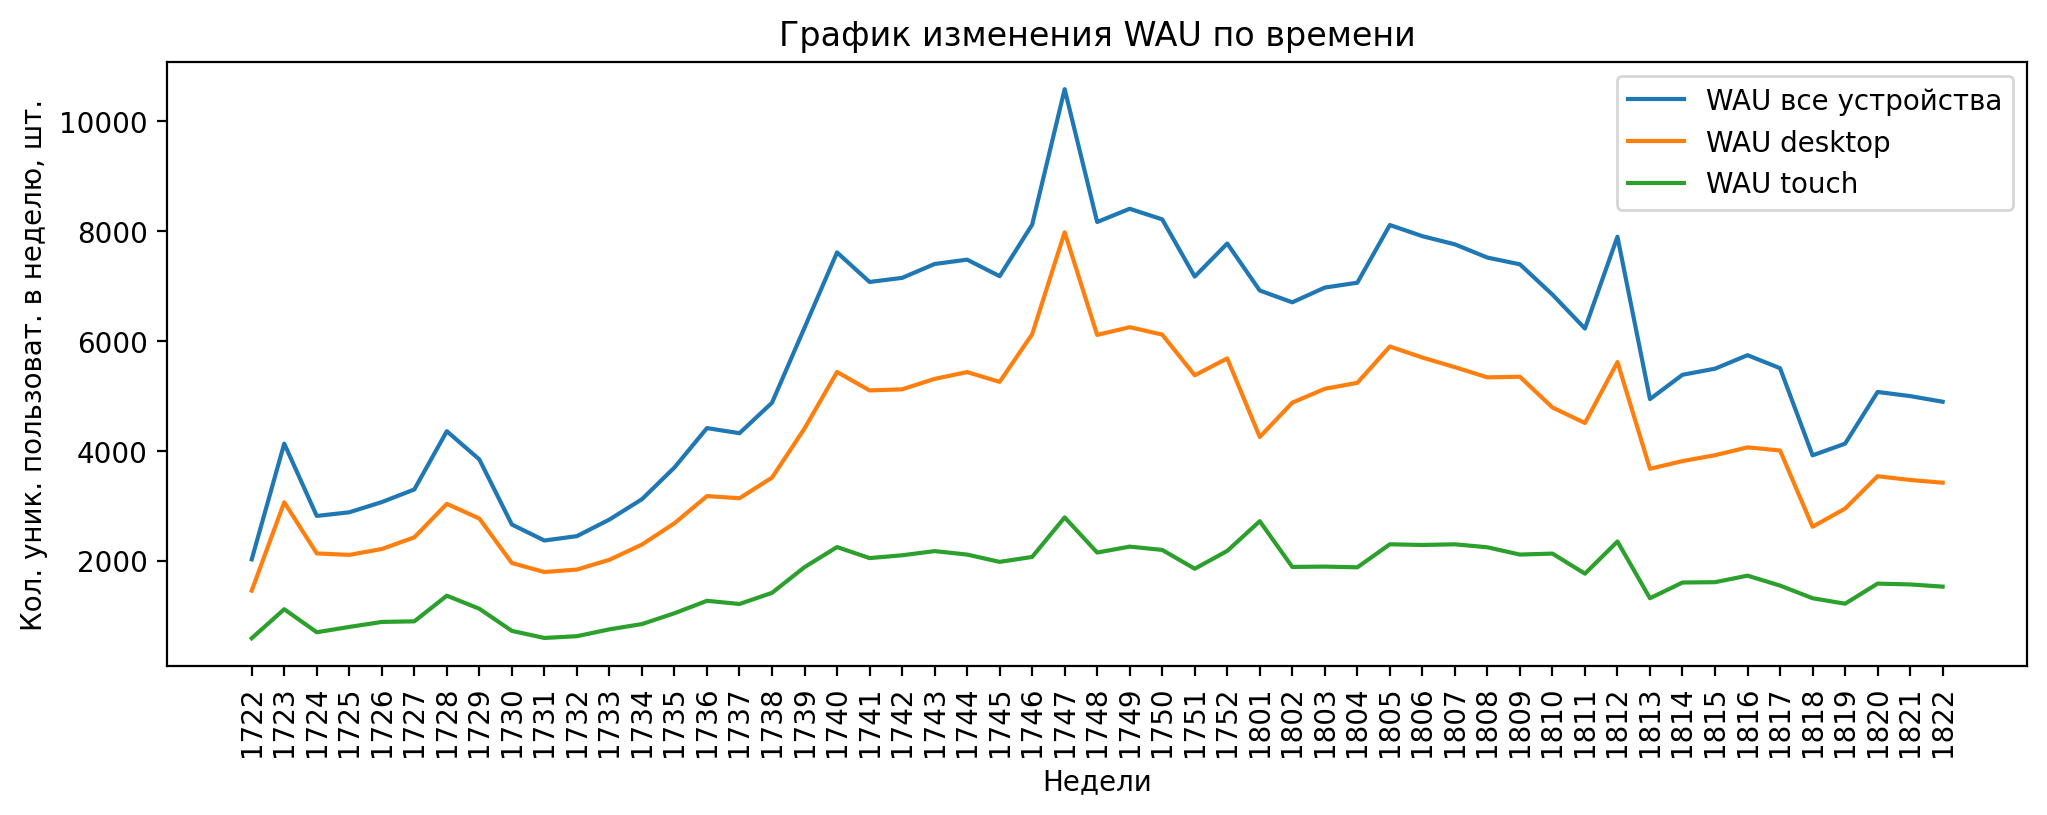

In [35]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x='ses_w', y='count_un_users', data=wau_all, label='WAU все устройства')
sns.lineplot(x='ses_w', y='count_un_users', data=wau_desktop, label='WAU desktop')
sns.lineplot(x='ses_w', y='count_un_users', data=wau_touch, label='WAU touch')
plt.title('График изменения WAU по времени')
plt.xlabel('Недели')
plt.ylabel('Кол. уник. пользоват. в неделю, шт.')
plt.xticks( rotation=90)
plt.show()

In [36]:
device_list

['touch', 'desktop']

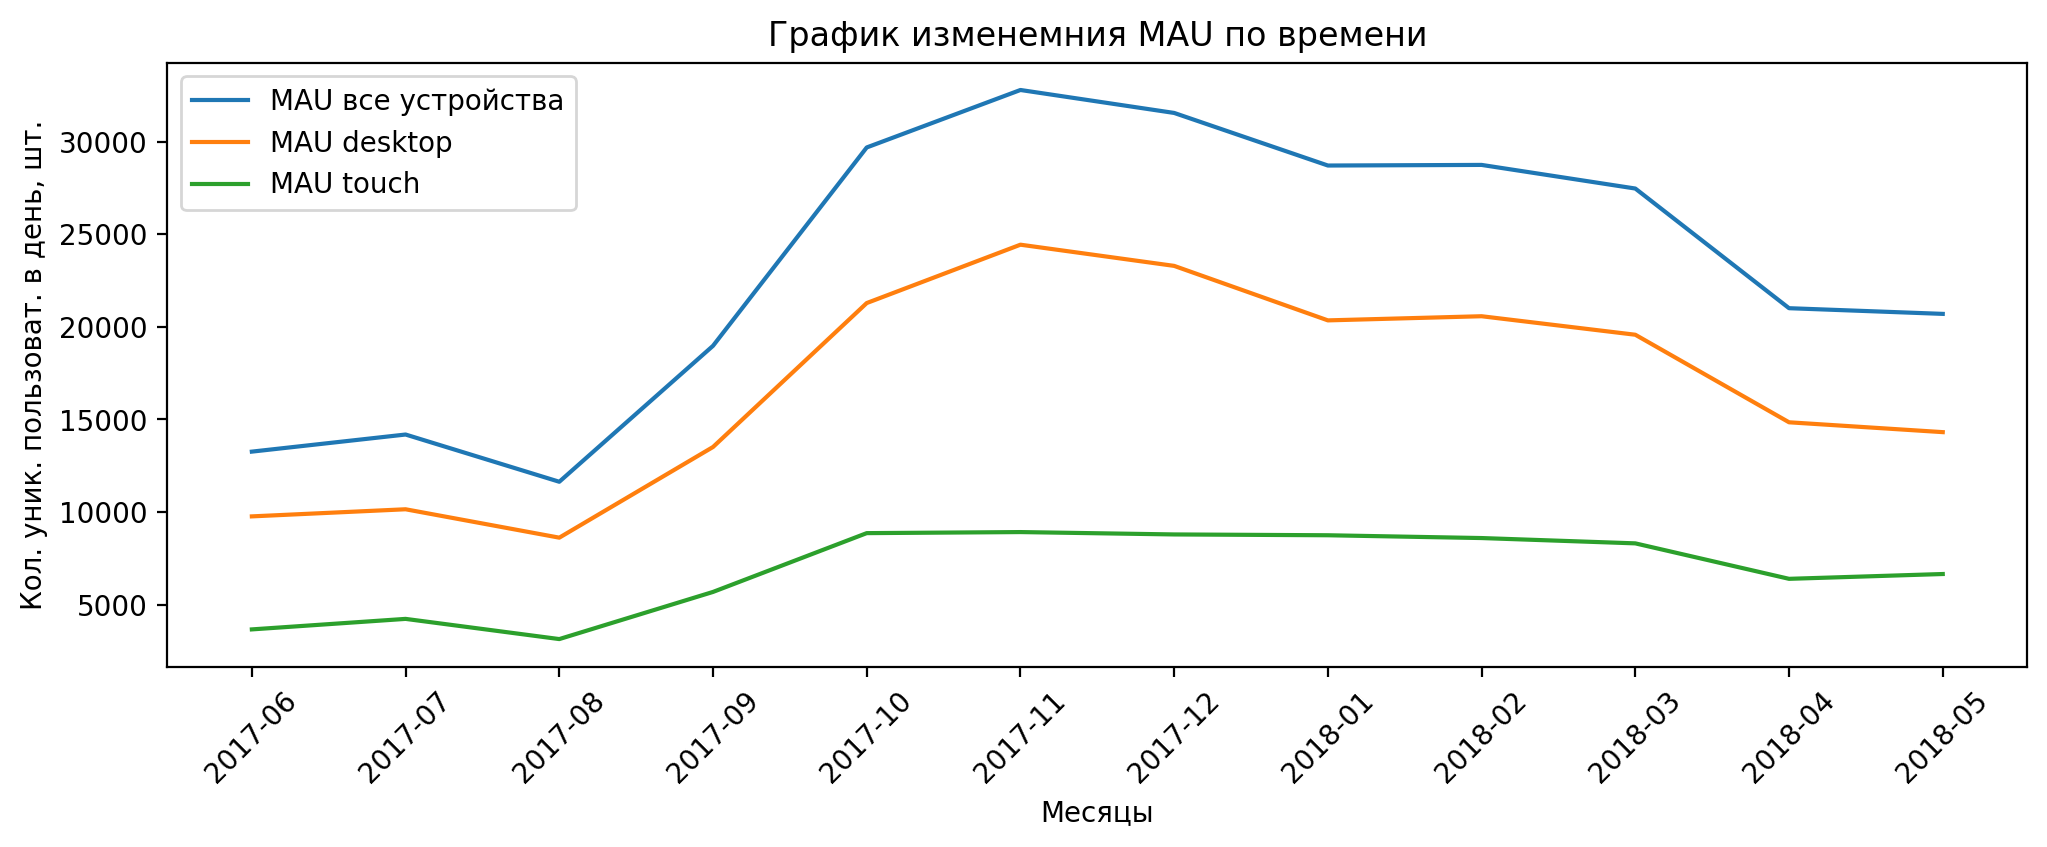

In [37]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x='ses_m', y='count_un_users', data=mau_all, label='MAU все устройства')
sns.lineplot(x='ses_m', y='count_un_users', data=mau_desktop, label='MAU desktop')
sns.lineplot(x='ses_m', y='count_un_users', data=mau_touch, label='MAU touch')
plt.title('График изменемния MAU по времени')
plt.xlabel('Месяцы')
plt.ylabel('Кол. уник. пользоват. в день, шт.')
plt.xticks(ticks=mau_all['ses_m'], rotation=45)
plt.show()

#### Выводы  по 2.1.1.<a name='step_2.1.1v'></a>
1. Cредние значения метрик по всем платформам за весь период (01.06.2017 - 31.05.2018 гг):  
DAU = 908  
WAU = 5_716  
MAU = 23_228   
Средние значения метрик не соответствуют математическому произведению одних из метрик на соответсвующие константы (количество дней в месяце, количество недель в месяце), что ожидаемо и не является аномалией. 

2. График MAU показывает наличие сезонности в использованинии услуги пользователями: летом активность минимальна, с увеличением в осенние месяцы и пиков в ноябре, затем наблюдается снижение активности (однако представлый период данных не позволяет проанализировать сезонность "год к году"). При этом, на платформе touch сезонность в осенне-весенний период отсутствут, по сравнению с сезонностью decktop пользователей.  
3. График WAU отражает общию тенденцию графика MAU, при этом, показывет наличие в рамках одного месяца разнонаправленные движения, направление которых может не соответствовать тренду месячного графика. А для различных платформ наблюдается в реде периодов разнонаправленная тенденция в одни и теже недели.  
4. График DAU свидетельствует о распределении в с двумя пиками в течении недели. т.е. в рамках недели наблюдается некоторая повторяющаяся "сезонность" по дням (для более подробных вывовдом по недельному распределению требуется дополнительное исследование). При делении на платформы распределение с двумя пиками характерно для decktop пользователей, а пользователи touch проказывают другую форму распределения (в большинстве случаем противоположно направленную по сравнению с deckop пользователям), кроме того недельная сезонность для touch пользователей не так выражена.

*Таким образом, наблюдается различия в между платформами пользователей:*
* в первую очередь в количестве
* во вторую очередь в характере изменения показателя во времени.

#### 2.1.2.  Количество заходов пользователей за день на сайт (среднее и изменение во времени)<a name='step_2.1.2'></a>

##### 2.1.2.1.  На основании метрики DAU<a name='step_2.1.2.1'></a>

In [38]:
dau_all.head()

ses_d  count_ses  count_un_users
0  2017-06-01        664             605
1  2017-06-02        658             608
2  2017-06-03        477             445
3  2017-06-04        510             476
4  2017-06-05        893             820

In [39]:
# добавление столбца с количеством заходов на сайт пользователей
dau_all['cnt_ses_per_user_d'] = round(dau_all['count_ses'] / dau_all['count_un_users'], 2)
dau_all.head(10)

ses_d  count_ses  count_un_users  cnt_ses_per_user_d
0  2017-06-01        664             605                1.10
1  2017-06-02        658             608                1.08
2  2017-06-03        477             445                1.07
3  2017-06-04        510             476                1.07
4  2017-06-05        893             820                1.09
5  2017-06-06        875             797                1.10
6  2017-06-07        788             699                1.13
7  2017-06-08        939             868                1.08
8  2017-06-09        755             695                1.09
9  2017-06-10        375             350                1.07

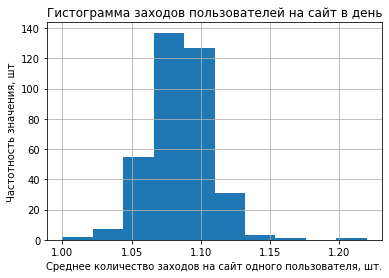

In [40]:
dau_all['cnt_ses_per_user_d'].hist()
plt.title('Гистограмма заходов пользователей на сайт в день')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Среднее количество заходов на сайт одного пользователя, шт.')
plt.show()

In [41]:
dau_all['cnt_ses_per_user_d'].describe()

count    364.000000
mean       1.082390
std        0.021321
min        1.000000
25%        1.070000
50%        1.080000
75%        1.090000
max        1.220000
Name: cnt_ses_per_user_d, dtype: float64

In [42]:
cnt_ses_per_user_d_mean = round(dau_all['cnt_ses_per_user_d'].mean(), 2)
print(cnt_ses_per_user_d_mean)

1.08


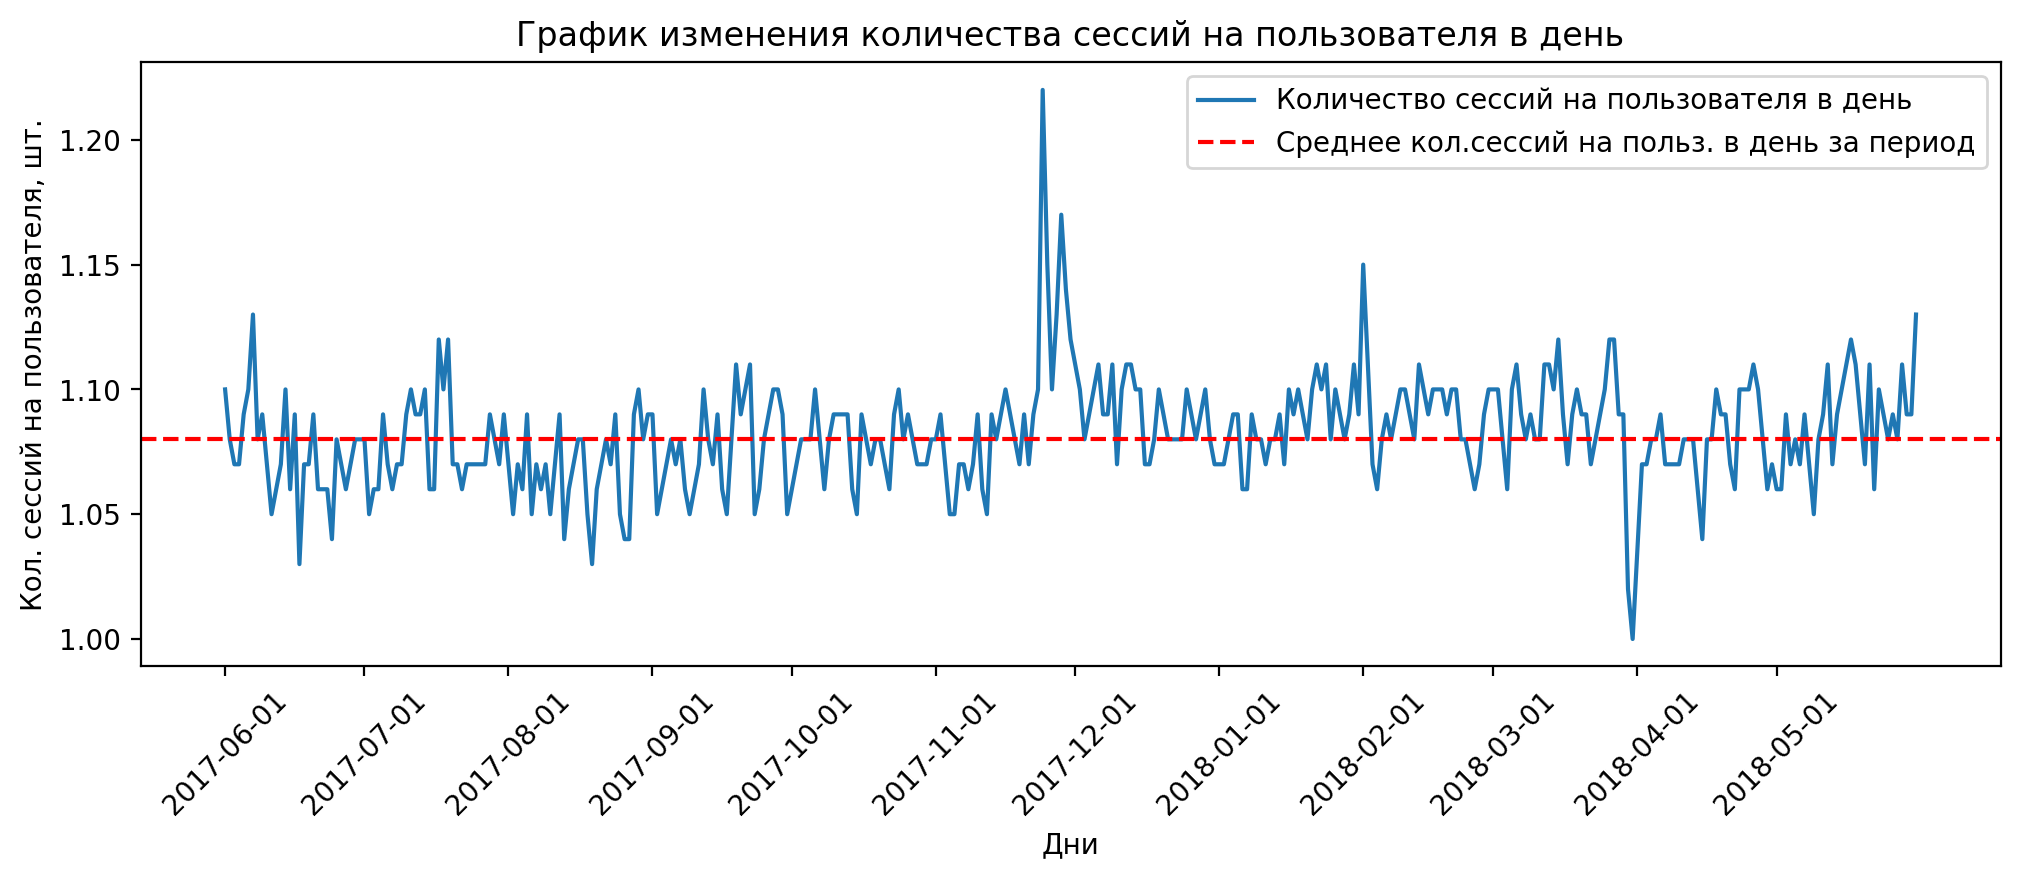

In [43]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x='ses_d', y='cnt_ses_per_user_d', data=dau_all, label='Количество сессий на пользователя в день')
plt.title('График изменения количества сессий на пользователя в день')
plt.xlabel('Дни')
plt.ylabel('Кол. сессий на пользователя, шт.')
plt.xticks(ticks=mau_all['ses_m'], rotation=45)
plt.axhline(cnt_ses_per_user_d_mean, ls='--', c='r', label='Среднее кол.сессий на польз. в день за период')
plt.legend()
plt.show()

##### 2.1.2.2.  Анализ на основании MAU<a name='step_2.1.2.2'></a>

In [44]:
mau_all['cnt_ses_per_user_m'] = round(mau_all['count_ses'] / mau_all['count_un_users'], 2)
mau_all.head()

ses_m  count_ses  count_un_users  cnt_ses_per_user_m
0  2017-06      16505           13259                1.24
1  2017-07      17828           14183                1.26
2  2017-08      14355           11631                1.23
3  2017-09      23907           18975                1.26
4  2017-10      37903           29692                1.28

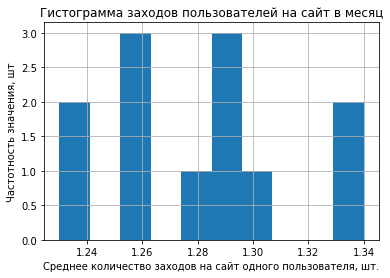

In [45]:
# гистограмма распределения значений 
mau_all['cnt_ses_per_user_m'].hist()
plt.title('Гистограмма заходов пользователей на сайт в месяц')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Среднее количество заходов на сайт одного пользователя, шт.')
plt.show()

In [46]:
# расчет среднего значения сессий на одного пользователя за месяц
cnt_ses_per_user_m_mean = round(mau_all['cnt_ses_per_user_m'].mean(), 2)
cnt_ses_per_user_m_mean

1.28

##### 2.1.2.3.  Анализ за весь период<a name='step_2.1.2.3'></a>

In [47]:
# подсчет количества сессий и уникальных пользователей за весь период
pau_all = df_v.agg({'uid': ['count', 'nunique']}).T.reset_index(drop=True)
pau_all

count  nunique
0  359400   228169

In [48]:
# определение количества месяцев в рассматриваемом периоде
pau_all['count_month'] = len(mau_all)
pau_all

count  nunique  count_month
0  359400   228169           12

In [49]:
# расчет среднего значения сессий на  одного пользователя за весь период
pau_all['cnt_ses_per_user_y'] = round(pau_all['count'] / pau_all['nunique'], 2)
pau_all

count  nunique  count_month  cnt_ses_per_user_y
0  359400   228169           12                1.58

#### Выводы  по 2.1.2.  <a name='step_2.1.2v'></a>
В среднем пользователи заходят на сайт 1.08 раз в день. Т.е. пользователь в среднем заходит на сайт только 1 раз в день.  
Данный показатель достаточно стабилен на протежении всего периода исследования - наблюдаются небольшие отклонения в ту или другую сторону и есть один всплеск в конце ноября и одно падение показателя в марте-апреле (рассмотрение причин падения в данном исследовании не производится).  

При этом, дополнительные исследования показали , что в течении месяца пользователь заходит на сайт только 1.28 раз, а за весь исследуемый период пользователи в среднем заходили только 1.58 раз.  

Таким образом, трафик заходов на сайт обеспечивается в основном за счет новых пользователей (более подробно когортный анализ будет рассмотрен в следующих разделах исследования) 

#### 2.1.3  Продолжительность сессии пользователей на сайте (ASL и распределение по пользователям)<a name='step_2.1.3'></a>

In [50]:
df_v['ses_duration_sec'] = (df_v['end_ts'] - df_v['start_ts']).dt.seconds
df_v.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid    ses_m ses_w       ses_d   ses_m_dt  \
0  16879256277535980062  2017-12  1751  2017-12-20 2017-12-01   
1    104060357244891740  2018-02  1808  2018-02-19 2018-02-01   
2   7459035603376831527  2017-07  1726  2017-07-01 2017-07-01   
3  16174680259334210214  2018-05  1820  2018-05-20 2018-05-01   
4   9969694820036681168  2017-12  1752  2017-12-27 2017-12-01   

   ses_duration_sec  
0              1080  
1              1680  
2                 0  
3              1440  
4                 0

In [51]:
ses_duration_sec_mean = int(round(df_v['ses_duration_sec'].mean(), 0))
ses_duration_sec_mean

644

In [52]:
df_v['ses_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: ses_duration_sec, dtype: float64

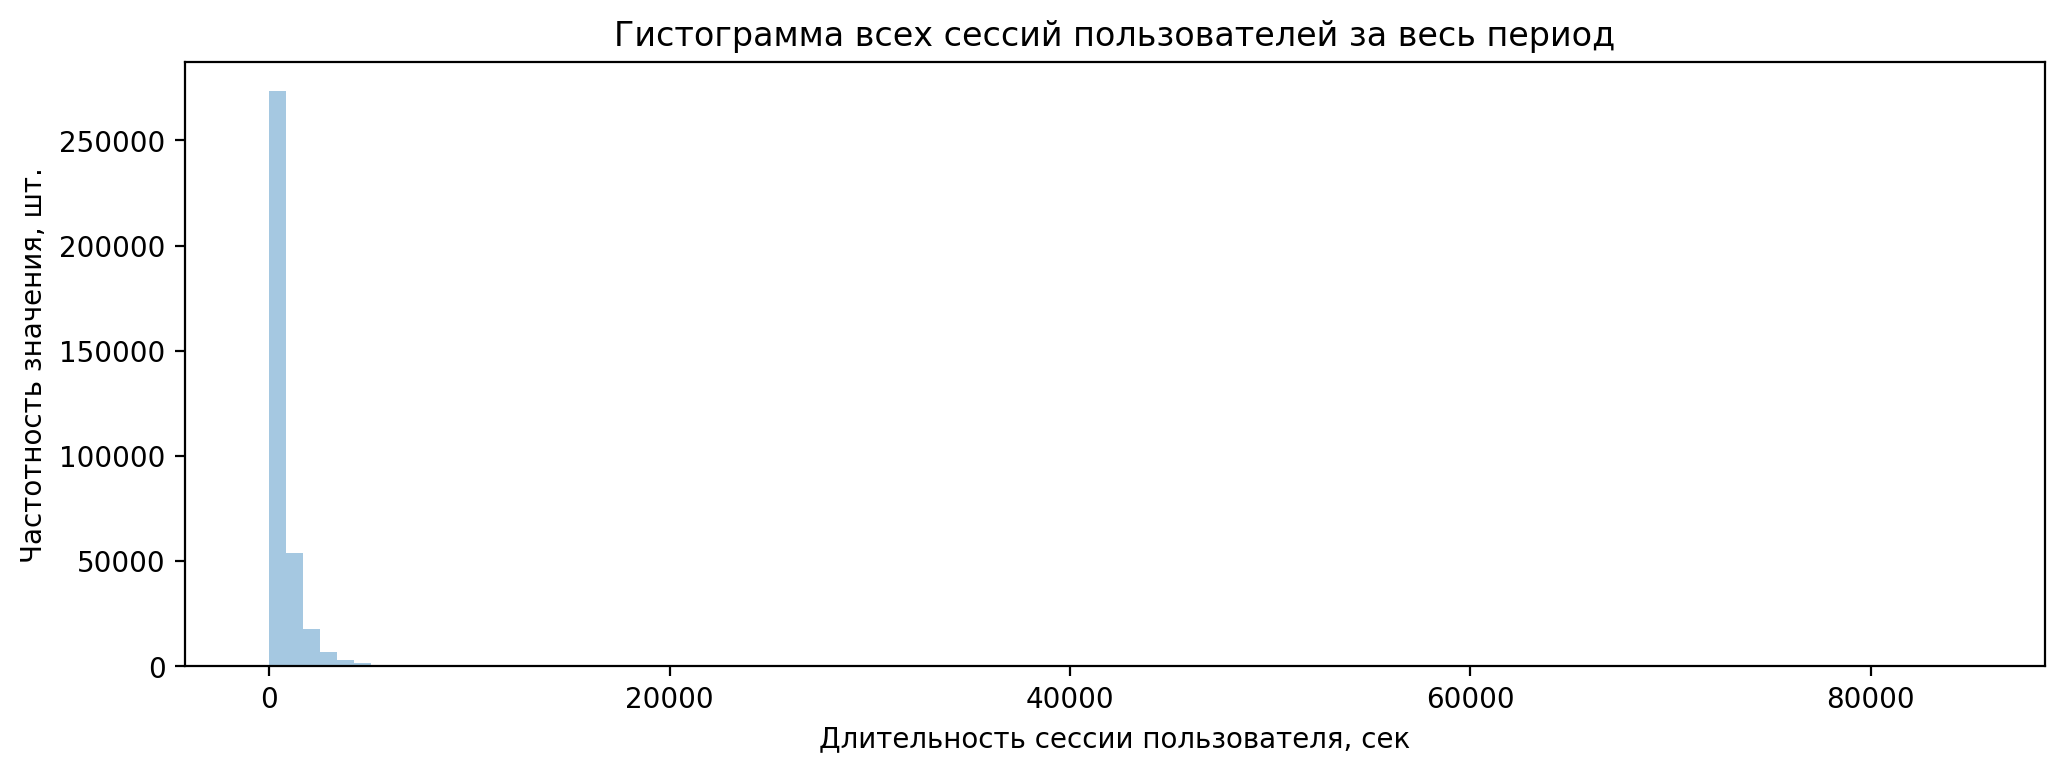

In [53]:
plt.figure(figsize=(12,4), dpi=200)
sns.distplot(df_v['ses_duration_sec'], bins=100, kde=False)
plt.title('Гистограмма всех сессий пользователей за весь период')
plt.xlabel('Длительность сессии пользователя, сек')
plt.ylabel('Частотность значения, шт.')
plt.show()

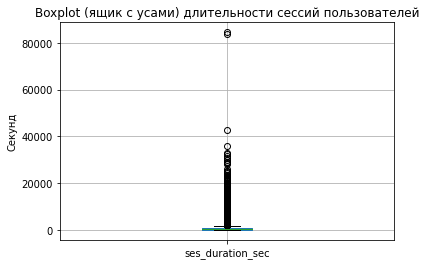

In [54]:
# ящик с усами распределения длительности сессий
df_v[['ses_duration_sec']].boxplot()
plt.title('Boxplot (ящик с усами) длительности сессий пользователей')
plt.ylabel('Секунд')
plt.show()

* Распределение имеет длиный хвост, и редкие выбросы не позволяют отобразить распределение наиболее частных значений.  
* отсечем значения выходящие за верхний ус

In [55]:
border_value = 1.5*(df_v['ses_duration_sec'].quantile(q=0.75) - df_v['ses_duration_sec'].quantile(q=0.25))
border_value

1080.0

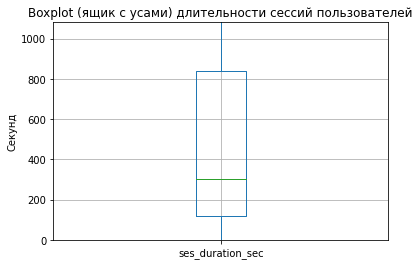

In [56]:
df_v[['ses_duration_sec']].boxplot()
plt.ylim(0, border_value)
plt.title('Boxplot (ящик с усами) длительности сессий пользователей')
plt.ylabel('Секунд')
plt.show()

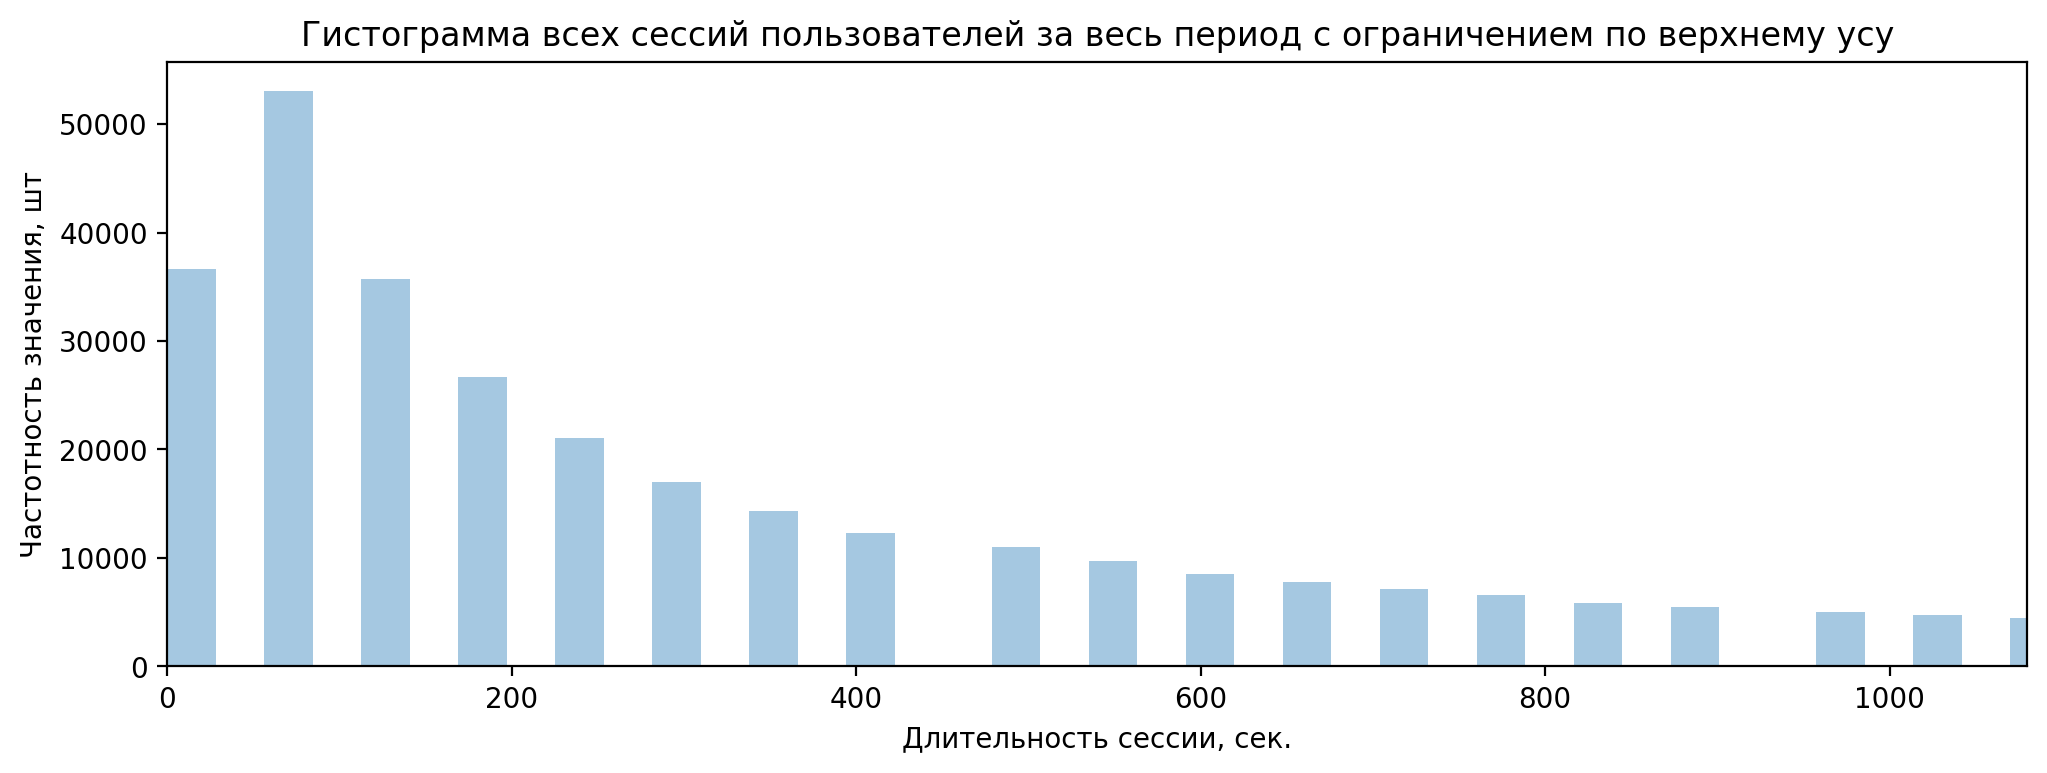

In [57]:
plt.figure(figsize=(12,4), dpi=200)
sns.distplot(df_v['ses_duration_sec'],bins=3000, kde=False)
plt.title('Гистограмма всех сессий пользователей за весь период с ограничением по верхнему усу')
plt.xlim(0, border_value)
plt.ylabel('Частотность значения, шт')
plt.xlabel('Длительность сессии, сек.')
plt.show()

In [58]:
# расчитаем моду распределения значений
print(df_v['ses_duration_sec'].mode())

0    60
dtype: int64


#### Выводы  по 2.1.3.    <a name='step_2.1.3v'></a>
Среднее значение mean() равно 644 сек и смещенно в право за счет длинного хвоста выбросов.
Мода равна 60 сек.  
Характер распределения гистограммы продолжительности сессий пользователей показывает, что в качестве "среднего" значения лучше использовать медиану - 300 сек. (5 мин.), как значение отражающее распределение данных.  
Таким образом, можно сделать вывод,  что пользователи в среднем проводят на сайте около 5 минут.  

#### 2.1.4.  Рассчет Retention Rate<a name='step_2.1.4'></a>

In [59]:
# создание справочника с датой первой сессии пользователя в формате день, неделя, месяц
first_ses_date_by_users = df_v.groupby('uid').agg({'start_ts': 'min', })
first_ses_date_by_users.columns = ['first_ses_ts']
first_ses_date_by_users['first_ses_w'] = first_ses_date_by_users['first_ses_ts'].dt.strftime('%y%W').astype('int')
first_ses_date_by_users['first_ses_m'] = first_ses_date_by_users['first_ses_ts'].astype('datetime64[M]')
first_ses_date_by_users['first_ses_d'] = first_ses_date_by_users['first_ses_ts'].astype('datetime64[D]')
first_ses_date_by_users.sample(10)

first_ses_ts  first_ses_w first_ses_m first_ses_d
uid                                                                          
1993849925130844191  2017-07-27 07:50:00         1730  2017-07-01  2017-07-27
14053861457921751166 2018-01-02 16:09:00         1801  2018-01-01  2018-01-02
6036257610962254847  2018-01-30 20:44:00         1805  2018-01-01  2018-01-30
9063221407336919836  2018-01-26 10:28:00         1804  2018-01-01  2018-01-26
14885903719211391999 2018-03-09 12:36:00         1810  2018-03-01  2018-03-09
2750218026677994903  2018-01-14 22:05:00         1802  2018-01-01  2018-01-14
6937457169897799250  2017-10-25 12:01:00         1743  2017-10-01  2017-10-25
14586841227707520484 2018-05-29 10:46:00         1822  2018-05-01  2018-05-29
1824868361442509862  2018-02-15 16:41:00         1807  2018-02-01  2018-02-15
16713995957767235712 2018-04-11 09:52:00         1815  2018-04-01  2018-04-11

In [60]:
# добавление в исходные данные данных о первой сессии
df_v = df_v.join(first_ses_date_by_users, on='uid')
df_v.sample(5)

device              end_ts  source_id            start_ts  \
130940  desktop 2017-06-22 11:41:00          3 2017-06-22 11:40:00   
95452   desktop 2017-10-13 22:37:00          4 2017-10-13 22:34:00   
218971  desktop 2018-02-18 19:37:00          3 2018-02-18 19:36:00   
315643  desktop 2018-02-07 13:09:00          3 2018-02-07 13:08:00   
40048     touch 2017-09-21 13:12:00          4 2017-09-21 13:07:00   

                         uid    ses_m ses_w       ses_d   ses_m_dt  \
130940  17001377395987163306  2017-06  1725  2017-06-22 2017-06-01   
95452    6136792377288841596  2017-10  1741  2017-10-13 2017-10-01   
218971  15034161419852325075  2018-02  1807  2018-02-18 2018-02-01   
315643   4159648151201563957  2018-02  1806  2018-02-07 2018-02-01   
40048   16691800279720528833  2017-09  1738  2017-09-21 2017-09-01   

        ses_duration_sec        first_ses_ts  first_ses_w first_ses_m  \
130940                60 2017-06-21 23:02:00         1725  2017-06-01   
95452                180 2017-10-13 22:34:00         1741  2017-10-01   
218971                60 2018-02-18 19:36:00         1807  2018-02-01   
315643                60 2018-02-07 10:59:00         1806  2018-02-01   
40048                300 2017-09-21 13:07:00         1738  2017-09-01   

       first_ses_d  
130940  2017-06-21  
95452   2017-10-13  
218971  2018-02-18  
315643  2018-02-07  
40048   2017-09-21

In [61]:
# приведение поля ses_d к типу datetime (для вычисления lifetime когорты)
df_v['ses_d'] = df_v['ses_d'].astype('datetime64[D]')

In [62]:
df_v['lifetime'] = round((df_v['ses_m_dt'] - df_v['first_ses_m']) / np.timedelta64(1, 'M'), 0).astype(int)
df_v.sample(5)

device              end_ts  source_id            start_ts  \
267909  desktop 2017-11-29 08:54:00          2 2017-11-29 08:51:00   
66710   desktop 2017-10-02 08:47:00          4 2017-10-02 08:35:00   
124220  desktop 2017-09-09 10:25:00          3 2017-09-09 10:22:00   
211279  desktop 2017-09-26 00:15:00          4 2017-09-26 00:06:00   
195376    touch 2017-06-21 18:27:00          2 2017-06-21 17:57:00   

                         uid    ses_m ses_w      ses_d   ses_m_dt  \
267909   1088381589355667185  2017-11  1748 2017-11-29 2017-11-01   
66710   13333688763172005752  2017-10  1740 2017-10-02 2017-10-01   
124220   3518635901169430528  2017-09  1736 2017-09-09 2017-09-01   
211279   9558076495807519650  2017-09  1739 2017-09-26 2017-09-01   
195376   7325838947271050231  2017-06  1725 2017-06-21 2017-06-01   

        ses_duration_sec        first_ses_ts  first_ses_w first_ses_m  \
267909               180 2017-11-29 08:51:00         1748  2017-11-01   
66710                720 2017-08-10 09:33:00         1732  2017-08-01   
124220               180 2017-09-09 10:22:00         1736  2017-09-01   
211279               540 2017-09-26 00:06:00         1739  2017-09-01   
195376              1800 2017-06-21 17:57:00         1725  2017-06-01   

       first_ses_d  lifetime  
267909  2017-11-29         0  
66710   2017-08-10         2  
124220  2017-09-09         0  
211279  2017-09-26         0  
195376  2017-06-21         0

In [63]:
count_users_cohort_gr = df_v.groupby(['first_ses_m', 'lifetime']).agg({'uid': 'nunique'})
count_users_cohort_gr.columns = ['count_u_users']
count_users_cohort_gr = count_users_cohort_gr.reset_index()
count_users_cohort_gr.head()

first_ses_m  lifetime  count_u_users
0  2017-06-01         0          13259
1  2017-06-01         1           1043
2  2017-06-01         2            713
3  2017-06-01         3            814
4  2017-06-01         4            909

In [64]:
# создаем справочник по когортам - первоначальное количество уникальных пользователей
cohort_usres_cnt = count_users_cohort_gr[count_users_cohort_gr['lifetime'] == 0][['first_ses_m', 'count_u_users']]
cohort_usres_cnt.columns = ['first_ses_m', 'first_count_u_users']
cohort_usres_cnt.head()

first_ses_m  first_count_u_users
0   2017-06-01                13259
12  2017-07-01                13140
23  2017-08-01                10181
33  2017-09-01                16704
42  2017-10-01                25977

In [65]:
# соединяем две таблицы 
count_users_cohort_gr = count_users_cohort_gr.merge(cohort_usres_cnt, on='first_ses_m')
count_users_cohort_gr.head()

first_ses_m  lifetime  count_u_users  first_count_u_users
0  2017-06-01         0          13259                13259
1  2017-06-01         1           1043                13259
2  2017-06-01         2            713                13259
3  2017-06-01         3            814                13259
4  2017-06-01         4            909                13259

In [66]:
# в новом столбце расчитаем retention rate
count_users_cohort_gr['retention_rate'] = round(count_users_cohort_gr['count_u_users']
                                                / count_users_cohort_gr['first_count_u_users'], 4)
count_users_cohort_gr.head()

first_ses_m  lifetime  count_u_users  first_count_u_users  retention_rate
0  2017-06-01         0          13259                13259          1.0000
1  2017-06-01         1           1043                13259          0.0787
2  2017-06-01         2            713                13259          0.0538
3  2017-06-01         3            814                13259          0.0614
4  2017-06-01         4            909                13259          0.0686

In [67]:
ret_rate_pvt = count_users_cohort_gr.pivot_table(index='first_ses_m',
                                                 columns='lifetime',
                                                 values='retention_rate',
                                                 aggfunc='sum')
ret_rate_pvt.index = ret_rate_pvt.index.strftime('%Y-%m-%d')

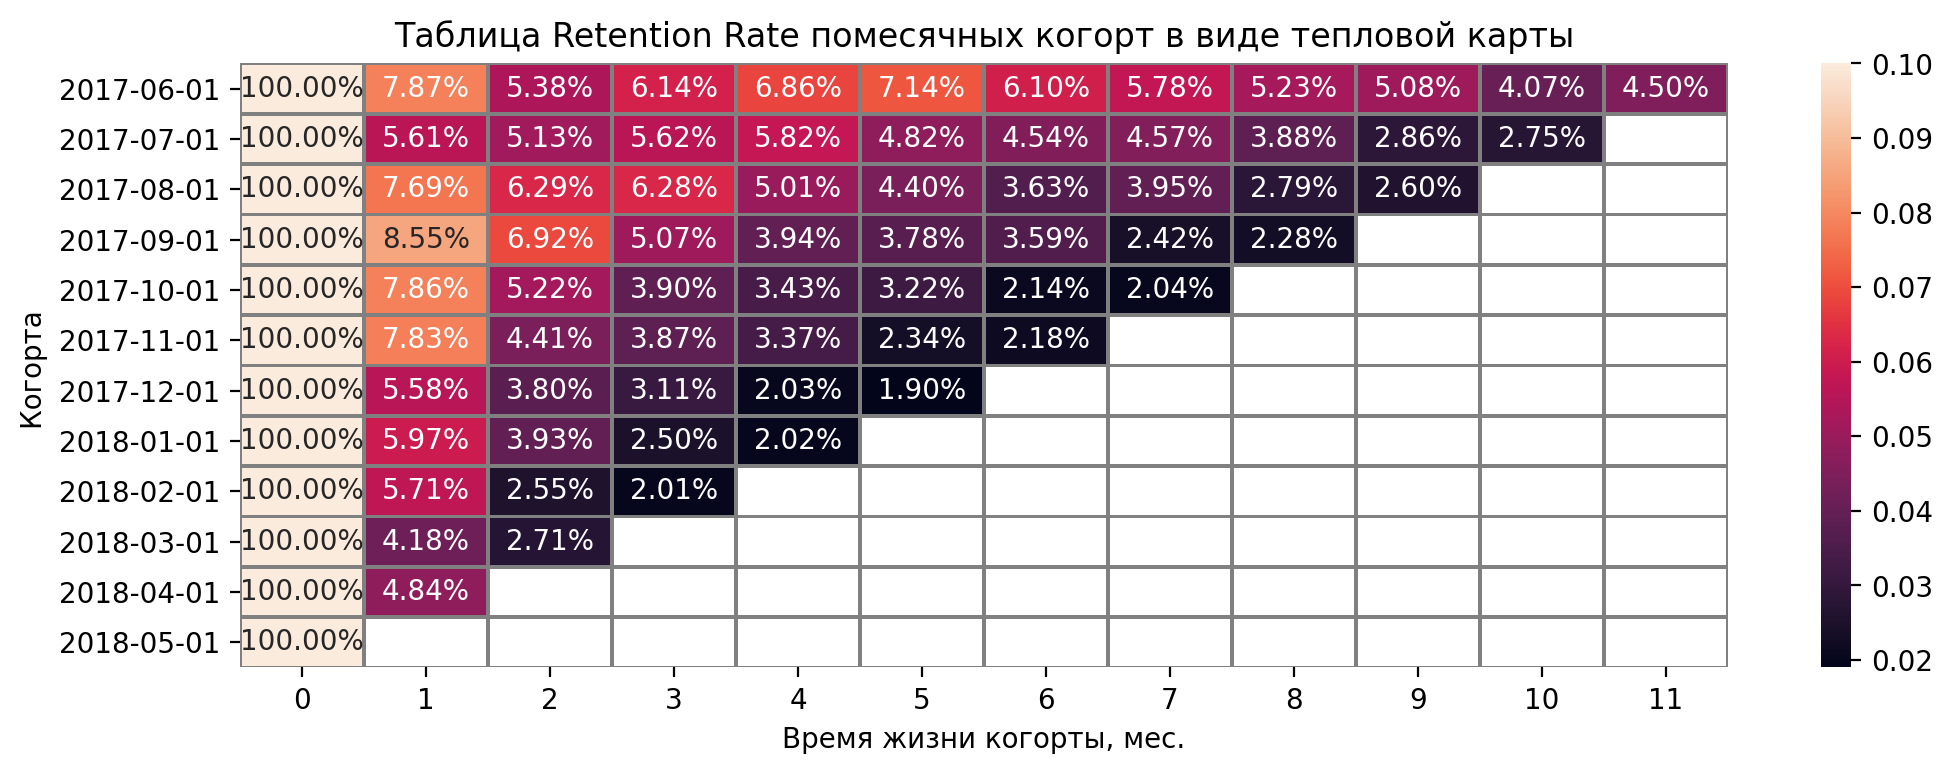

In [68]:
plt.figure(figsize=(12,4), dpi=200)

sns.heatmap(ret_rate_pvt, vmax=0.1, annot=True, fmt='.2%', linewidths=1, linecolor='gray')
plt.title('Таблица Retention Rate помесячных когорт в виде тепловой карты')
plt.ylabel('Когорта ')
plt.xlabel('Время жизни когорты, мес.')
plt.show()

#### Выводы  по 2.1.4.   <a name='step_2.1.4v'></a>
* Расчитанный Retention Rate наглядно показывает, что возвращаемость пользователей в сервис имеет тенденцию к снижению в течении времени жизни когорты (за год снижается до 1% для первой и второй когорты).  
* По новым когортам наблюдается снижение коэффициента за 1-ый месяц жизни (по сравнению с первой когортой) и уменьшение его до 0 - пользователи перестают пользоваться сервисом.  
Для выяснения причин оттока пользователей требуется дополнительное исследование.

### 2.2.  Метрики электронной коммерции (на основании данных заказов)<a name='step_2.2'></a>

#### 2.2.1.  Исследование среднего времени с момента первого посещения сайта до покупки<a name='step_2.2.1'></a>

In [69]:
# создание справочника дат первых заказов пользоватлей (uid)
uid_first_order_ts = df_o.groupby('uid').agg({'buy_ts': 'min'})
uid_first_order_ts = uid_first_order_ts.rename(columns= {'buy_ts': 'first_buy_ts'}).reset_index()
uid_first_order_ts.head()

uid        first_buy_ts
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00

In [70]:
len(uid_first_order_ts)

36522

In [71]:
# соединение полученного справочника с данными о посещении сайта пользователем
lag_v_o = (df_v[df_v['start_ts'] == df_v['first_ses_ts']]
           [['device', 'source_id', 'first_ses_ts', 'uid']]
           .merge(uid_first_order_ts, how='right', on='uid'))
lag_v_o.head(5)

device  source_id        first_ses_ts               uid  \
0  desktop          2 2017-09-18 22:49:00   313578113262317   
1    touch         10 2017-06-03 10:13:00  1575281904278712   
2  desktop          3 2017-10-11 17:14:00  2429014661409475   
3  desktop          5 2018-01-27 20:10:00  2464366381792757   
4  desktop          5 2017-11-24 10:14:00  2551852515556206   

         first_buy_ts  
0 2018-01-03 21:51:00  
1 2017-06-03 10:13:00  
2 2017-10-11 18:33:00  
3 2018-01-28 15:54:00  
4 2017-11-24 10:14:00

In [72]:
lag_v_o['first_ses_ts'].isna().sum()

0

Все строки заказов были сопоставлены с временем начала сессии в таблице сессий.

In [73]:
# добавление в итоговую таблицу столбца с длительностью между первым посящением и покупкой (в часах)
lag_v_o['lag_view_order_h'] = (lag_v_o['first_buy_ts'] - lag_v_o['first_ses_ts']) / np.timedelta64(1, 'h')
lag_v_o.sample(10)

device  source_id        first_ses_ts                   uid  \
14848  desktop          3 2017-10-17 13:11:00   7459422840375616878   
32305  desktop          3 2017-09-19 21:29:00  16307240880503180240   
20292  desktop          3 2017-12-15 12:36:00  10255413709144240332   
3797   desktop          3 2018-05-17 11:31:00   1916279765328983577   
8703   desktop         10 2017-09-22 13:33:00   4388675629050219785   
9682   desktop         10 2018-02-03 22:23:00   4898212856941559191   
8515   desktop          3 2017-11-24 14:25:00   4289989609388196465   
32214  desktop          1 2018-04-02 23:24:00  16260983371840577820   
17137  desktop          1 2017-06-20 12:36:00   8625171311425605018   
30683  desktop          3 2018-01-20 21:37:00  15464993834453819542   

             first_buy_ts  lag_view_order_h  
14848 2017-10-18 22:10:00         32.983333  
32305 2017-09-19 21:34:00          0.083333  
20292 2017-12-15 12:42:00          0.100000  
3797  2018-05-17 11:35:00          0.066667  
8703  2017-09-22 14:17:00          0.733333  
9682  2018-02-03 22:24:00          0.016667  
8515  2017-11-24 15:10:00          0.750000  
32214 2018-04-02 23:26:00          0.033333  
17137 2017-06-20 12:36:00          0.000000  
30683 2018-01-20 21:49:00          0.200000

In [74]:
lag_v_o['lag_view_order_h'].describe() 

count    36522.000000
mean       405.680703
std       1129.759718
min          0.000000
25%          0.066667
50%          0.266667
75%         48.291667
max       8719.066667
Name: lag_view_order_h, dtype: float64

In [75]:
# данные содержат длинный хвост, который на три порядка смещает среднее значения вправо
# рассчитаем верхний ус  
border_value_lag = round(1.5*(lag_v_o['lag_view_order_h'].quantile(q=0.75) - lag_v_o['lag_view_order_h'].quantile(q=0.25)), 2)
border_value_lag

72.34

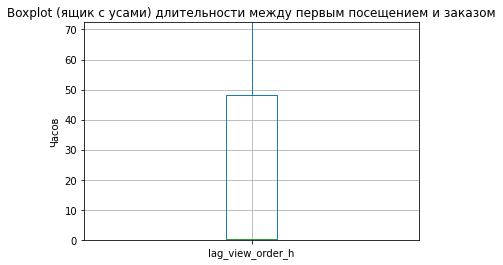

In [76]:
# построим ящик с усами с ограничением по верхнему усу
lag_v_o[['lag_view_order_h']].boxplot()
plt.title('Boxplot (ящик с усами) длительности между первым посещением и заказом')
plt.ylabel('Часов')
plt.ylim(0, border_value_lag)
plt.show()

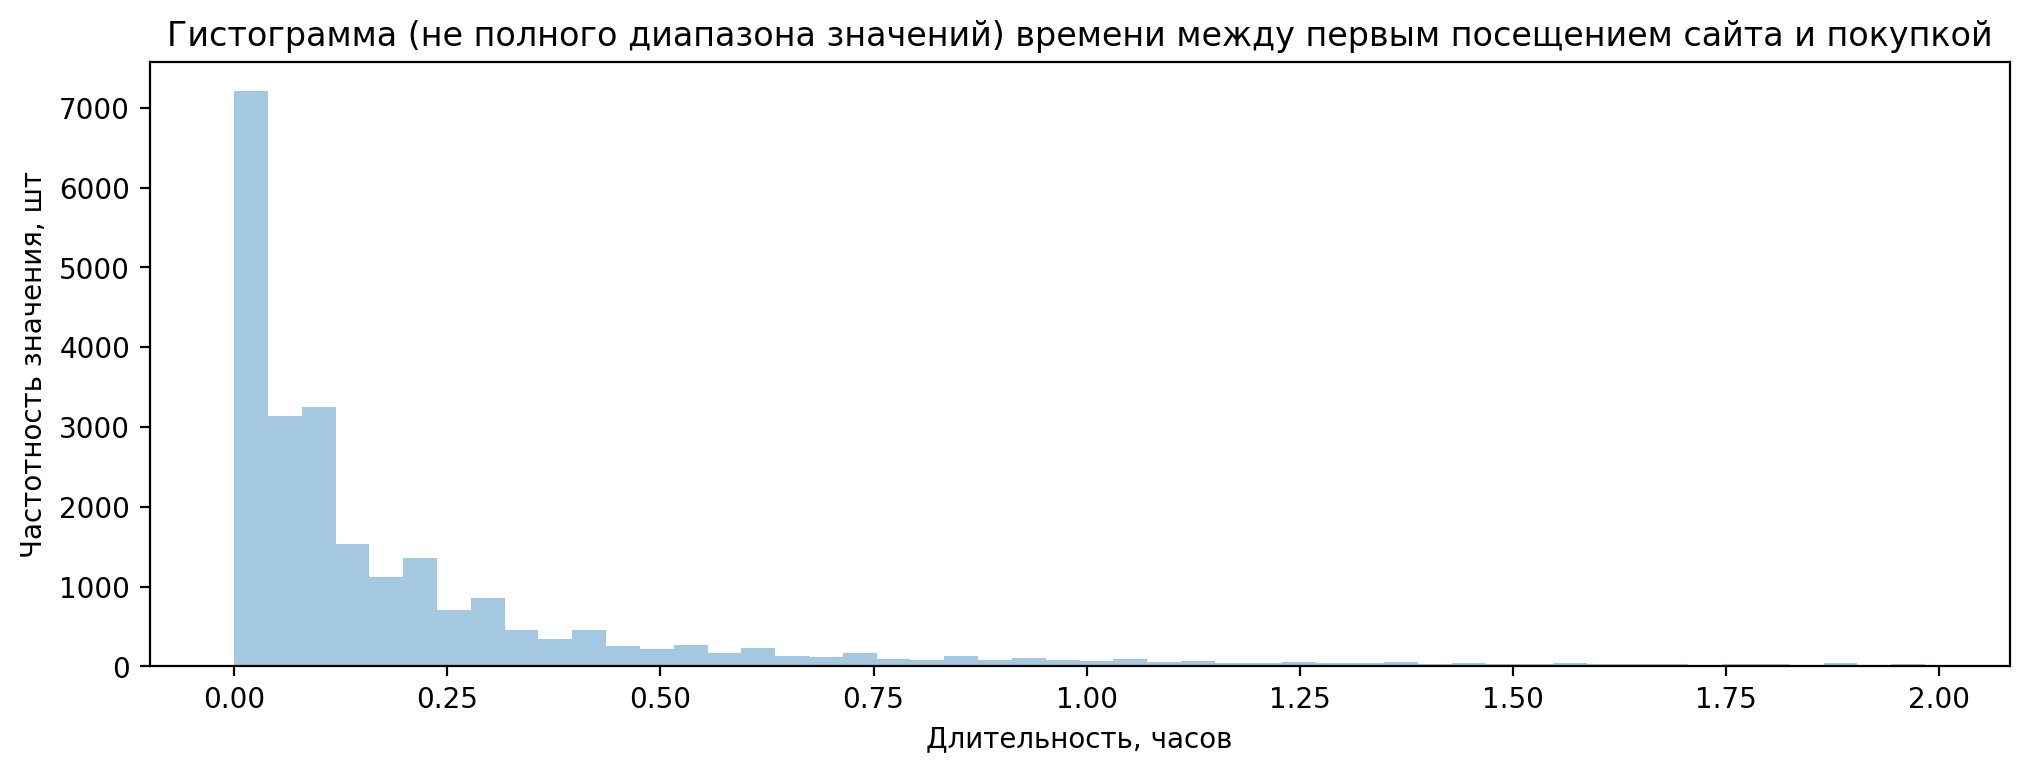

In [77]:
# учитывая такое расспределение данных для построения гистограммы ограничим длительность между посещением и заказом до 2ч.
plt.figure(figsize=(12,4), dpi=200)
sns.distplot(lag_v_o[lag_v_o['lag_view_order_h'].notna() & (lag_v_o['lag_view_order_h'] < 2)]['lag_view_order_h'],
             kde=False)
plt.title('Гистограмма (не полного диапазона значений) времени между первым посещением сайта и покупкой')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Длительность, часов')
plt.show()

#### Выводы по  2.2.1.  <a name='step_2.2.1v'></a> 
* Распределение значений имеет очень существенный хвост вправо, в результате чего медиана (0.27 ч.) отличается от среднего 406 ч. на три порядка. 
* При таких значениях в качестве среднего значения лучше использовать медиану. 

Таким образом, между первым посещение сайта и заказом в среднем проходит около 30 минут.

#### 2.2.2.  Расчет среднего количества покупок на одного клиента за период<a name='step_2.2.2'></a>

In [78]:
# добавим в данные о заказах столбец формата месяц (datetime)
df_o['buy_m'] = df_o['buy_ts'].astype('datetime64[M]')

In [79]:
# добавим в справочник uid_first_order_ts столбец формата месяц (datetime)
uid_first_order_ts['first_buy_m'] = uid_first_order_ts['first_buy_ts'].astype('datetime64[M]')
uid_first_order_ts.head(2)

uid        first_buy_ts first_buy_m
0   313578113262317 2018-01-03 21:51:00  2018-01-01
1  1575281904278712 2017-06-03 10:13:00  2017-06-01

In [80]:
# добавим данный справочник к данным о заказах df_o
df_o = df_o.merge(uid_first_order_ts, on='uid')
df_o.head()

buy_ts  revenue                   uid      buy_m  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   

         first_buy_ts first_buy_m  
0 2017-06-01 00:10:00  2017-06-01  
1 2017-06-01 00:25:00  2017-06-01  
2 2017-06-01 00:27:00  2017-06-01  
3 2017-06-01 00:29:00  2017-06-01  
4 2017-06-01 07:58:00  2017-06-01

In [81]:
# добавим в df_o столбец с lifetime когорты (период когор месяц)

In [82]:
df_o['lifetime'] = ((df_o['buy_m'] - df_o['first_buy_m']) / np.timedelta64(1, 'M')).round().astype('int')
df_o.sample(5)

buy_ts  revenue                   uid      buy_m  \
31708 2018-01-03 21:51:00     0.55       313578113262317 2018-01-01   
4897  2017-07-05 10:31:00     1.71    364397414494395726 2017-07-01   
27272 2017-12-10 19:44:00     1.22   6524929967185265961 2017-12-01   
11269 2017-09-16 22:39:00     1.83  14456906701215476284 2017-09-01   
23776 2017-11-24 22:14:00     0.09  16451684419482268692 2017-11-01   

             first_buy_ts first_buy_m  lifetime  
31708 2018-01-03 21:51:00  2018-01-01         0  
4897  2017-07-05 10:31:00  2017-07-01         0  
27272 2017-12-10 19:44:00  2017-12-01         0  
11269 2017-09-16 22:39:00  2017-09-01         0  
23776 2017-11-24 22:14:00  2017-11-01         0

In [83]:
# сгруппируем данные по когортам и посчитаем сумму заказов, количество заказов, кол. уникальных пользователей
cohort_o_gr_m = df_o.groupby(['first_buy_m', 'lifetime']).agg({'revenue': 'sum', 'uid': ['count', 'nunique']}).reset_index()
cohort_o_gr_m.columns = ['first_buy_m', 'lifetime', 'sum_buy', 'count_buy', 'count_u_users']
cohort_o_gr_m

first_buy_m  lifetime   sum_buy  count_buy  count_u_users
0   2017-06-01         0   9557.49       2354           2023
1   2017-06-01         1    981.82        177             61
2   2017-06-01         2    885.34        174             50
3   2017-06-01         3   1931.30        226             54
4   2017-06-01         4   2068.58        292             88
..         ...       ...       ...        ...            ...
73  2018-03-01         1   1063.05        178             90
74  2018-03-01         2   1114.87        176             58
75  2018-04-01         0  10600.69       2495           2276
76  2018-04-01         1   1209.92        195             69
77  2018-05-01         0  13925.76       3249           2988

[78 rows x 5 columns]

In [84]:
# создадим справочник с количеством уникальных пользователей в каждой когорте
cohort_o_count_users = cohort_o_gr_m[cohort_o_gr_m['lifetime'] == 0][['first_buy_m', 'count_u_users']]
cohort_o_count_users = cohort_o_count_users.rename(columns={'count_u_users': 'first_count_users'})
cohort_o_count_users

first_buy_m  first_count_users
0   2017-06-01               2023
12  2017-07-01               1923
23  2017-08-01               1370
33  2017-09-01               2581
42  2017-10-01               4340
50  2017-11-01               4081
57  2017-12-01               4383
63  2018-01-01               3373
68  2018-02-01               3651
72  2018-03-01               3533
75  2018-04-01               2276
77  2018-05-01               2988

In [85]:
# добавим созданный справочник в cohort_o_gr_m
cohort_o_gr_m = cohort_o_gr_m.merge(cohort_o_count_users, on='first_buy_m')
cohort_o_gr_m.head(5)

first_buy_m  lifetime  sum_buy  count_buy  count_u_users  first_count_users
0  2017-06-01         0  9557.49       2354           2023               2023
1  2017-06-01         1   981.82        177             61               2023
2  2017-06-01         2   885.34        174             50               2023
3  2017-06-01         3  1931.30        226             54               2023
4  2017-06-01         4  2068.58        292             88               2023

In [86]:
# добавим столбец с количеством заказов на одного пользователя в когорте по lifetime
cohort_o_gr_m['count_buy_per_one_user'] = cohort_o_gr_m['count_buy'] /  cohort_o_gr_m['first_count_users']
# добавим столбец с выручкой на одного пользователя в когорте по lifetime
cohort_o_gr_m['sum_buy_per_one_user'] = cohort_o_gr_m['sum_buy'] /  cohort_o_gr_m['first_count_users']
cohort_o_gr_m

first_buy_m  lifetime   sum_buy  count_buy  count_u_users  \
0   2017-06-01         0   9557.49       2354           2023   
1   2017-06-01         1    981.82        177             61   
2   2017-06-01         2    885.34        174             50   
3   2017-06-01         3   1931.30        226             54   
4   2017-06-01         4   2068.58        292             88   
..         ...       ...       ...        ...            ...   
73  2018-03-01         1   1063.05        178             90   
74  2018-03-01         2   1114.87        176             58   
75  2018-04-01         0  10600.69       2495           2276   
76  2018-04-01         1   1209.92        195             69   
77  2018-05-01         0  13925.76       3249           2988   

    first_count_users  count_buy_per_one_user  sum_buy_per_one_user  
0                2023                1.163618              4.724414  
1                2023                0.087494              0.485329  
2                2023                0.086011              0.437637  
3                2023                0.111715              0.954671  
4                2023                0.144340              1.022531  
..                ...                     ...                   ...  
73               3533                0.050382              0.300892  
74               3533                0.049816              0.315559  
75               2276                1.096221              4.657597  
76               2276                0.085677              0.531599  
77               2988                1.087349              4.660562  

[78 rows x 8 columns]

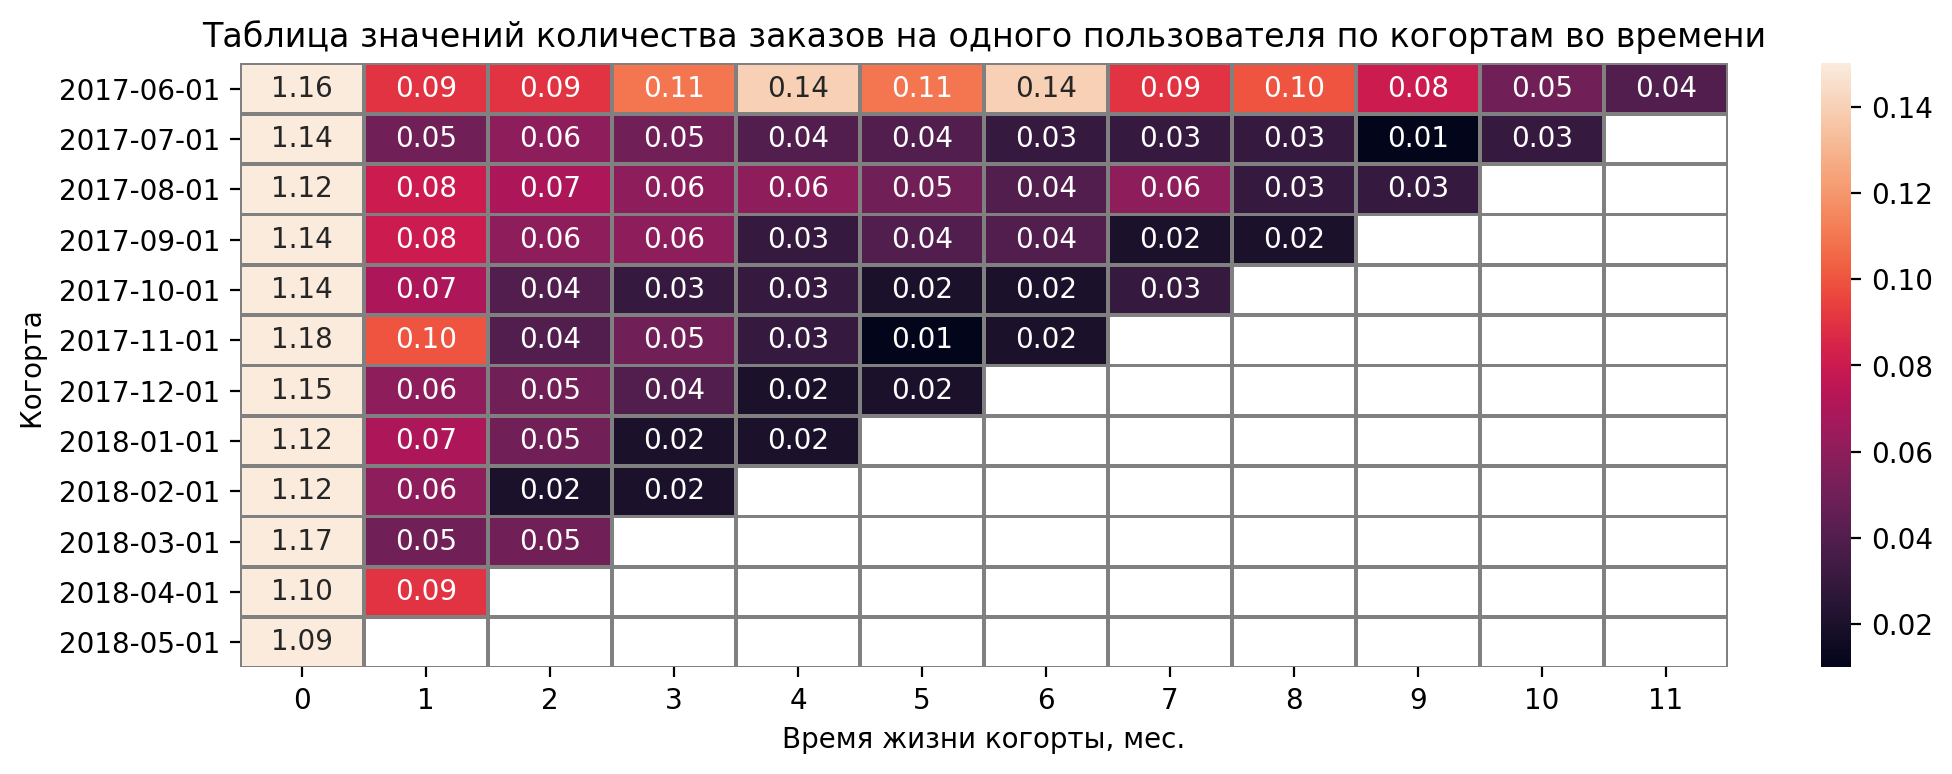

In [87]:
# построим сводную таблицу по когортам и по lifetime со значением количества заказов на одного пользователя
cohort_cnt_o_m = cohort_o_gr_m.pivot_table(index='first_buy_m', columns='lifetime', values= 'count_buy_per_one_user').round(2)
cohort_cnt_o_m.index = cohort_cnt_o_m.index.strftime('%Y-%m-%d')
plt.figure(figsize=(12,4), dpi=200)
sns.heatmap(cohort_cnt_o_m, vmax=0.15, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Таблица значений количества заказов на одного пользователя по когортам во времени')
plt.ylabel('Когорта ')
plt.xlabel('Время жизни когорты, мес.')
plt.show()

In [88]:
# сделаем срез данных ограничив время жизни когорт 6-ю месяцами и оставив когорты с набором значений за первые 6-ть месяцев
cohort_cnt_o_m_slice = cohort_cnt_o_m.loc[:'2018-01-01', '0':'5']
cohort_cnt_o_m_slice

lifetime        0     1     2     3     4     5
first_buy_m                                    
2017-06-01   1.16  0.09  0.09  0.11  0.14  0.11
2017-07-01   1.14  0.05  0.06  0.05  0.04  0.04
2017-08-01   1.12  0.08  0.07  0.06  0.06  0.05
2017-09-01   1.14  0.08  0.06  0.06  0.03  0.04
2017-10-01   1.14  0.07  0.04  0.03  0.03  0.02
2017-11-01   1.18  0.10  0.04  0.05  0.03  0.01
2017-12-01   1.15  0.06  0.05  0.04  0.02  0.02
2018-01-01   1.12  0.07  0.05  0.02  0.02   NaN

In [89]:
cohort_cnt_o_m_slice_mean_all = cohort_cnt_o_m_slice.mean(axis=1).round(2)
cohort_cnt_o_m_slice_mean_all

first_buy_m
2017-06-01    0.28
2017-07-01    0.23
2017-08-01    0.24
2017-09-01    0.24
2017-10-01    0.22
2017-11-01    0.24
2017-12-01    0.22
2018-01-01    0.26
dtype: float64

In [90]:
cohort_cnt_o_m_slice_mean_avg = cohort_cnt_o_m_slice_mean_all.mean()
cohort_cnt_o_m_slice_mean_avg

0.24125

#### Выводы по  2.2.2.   <a name='step_2.2.2v'></a>  
* Когортный анализ показывают, что пользователи делают чуть больше одного заказа в первый месяц (~1.15), а затем возвращаемость клиентов в помесячном расчете  5 - 10 % и снижается  до нуля (за несколько месяцева), негативная тенденция усиливается у старших когорт.
* В результате этого, среднее количество покупок на одного пользователя за 6 месяцев составляет 0.235.

При данной низкой возвращаемости пользователей в сервис говорить о среднем количестве заказов за какой-либо период не корректно, потому что фактически пользователь использует сервис в первый месяц и затем уходит из него и те 5-10% процентов возвращаемости могут обеспечивать одни и теже пользователи - постоянные клиенты (подробнее см. дальше разделы исследования).

#### 2.2.3.  Расчет средней выручки с пользователя (изучение динамики метрики во времени)<a name='step_2.2.3'></a>

#### 2.2.3.1.  Расчет в рамках когорт <a name='step_2.2.3.1'></a>

In [91]:
cohort_o_gr_m.head(5)

first_buy_m  lifetime  sum_buy  count_buy  count_u_users  first_count_users  \
0  2017-06-01         0  9557.49       2354           2023               2023   
1  2017-06-01         1   981.82        177             61               2023   
2  2017-06-01         2   885.34        174             50               2023   
3  2017-06-01         3  1931.30        226             54               2023   
4  2017-06-01         4  2068.58        292             88               2023   

   count_buy_per_one_user  sum_buy_per_one_user  
0                1.163618              4.724414  
1                0.087494              0.485329  
2                0.086011              0.437637  
3                0.111715              0.954671  
4                0.144340              1.022531

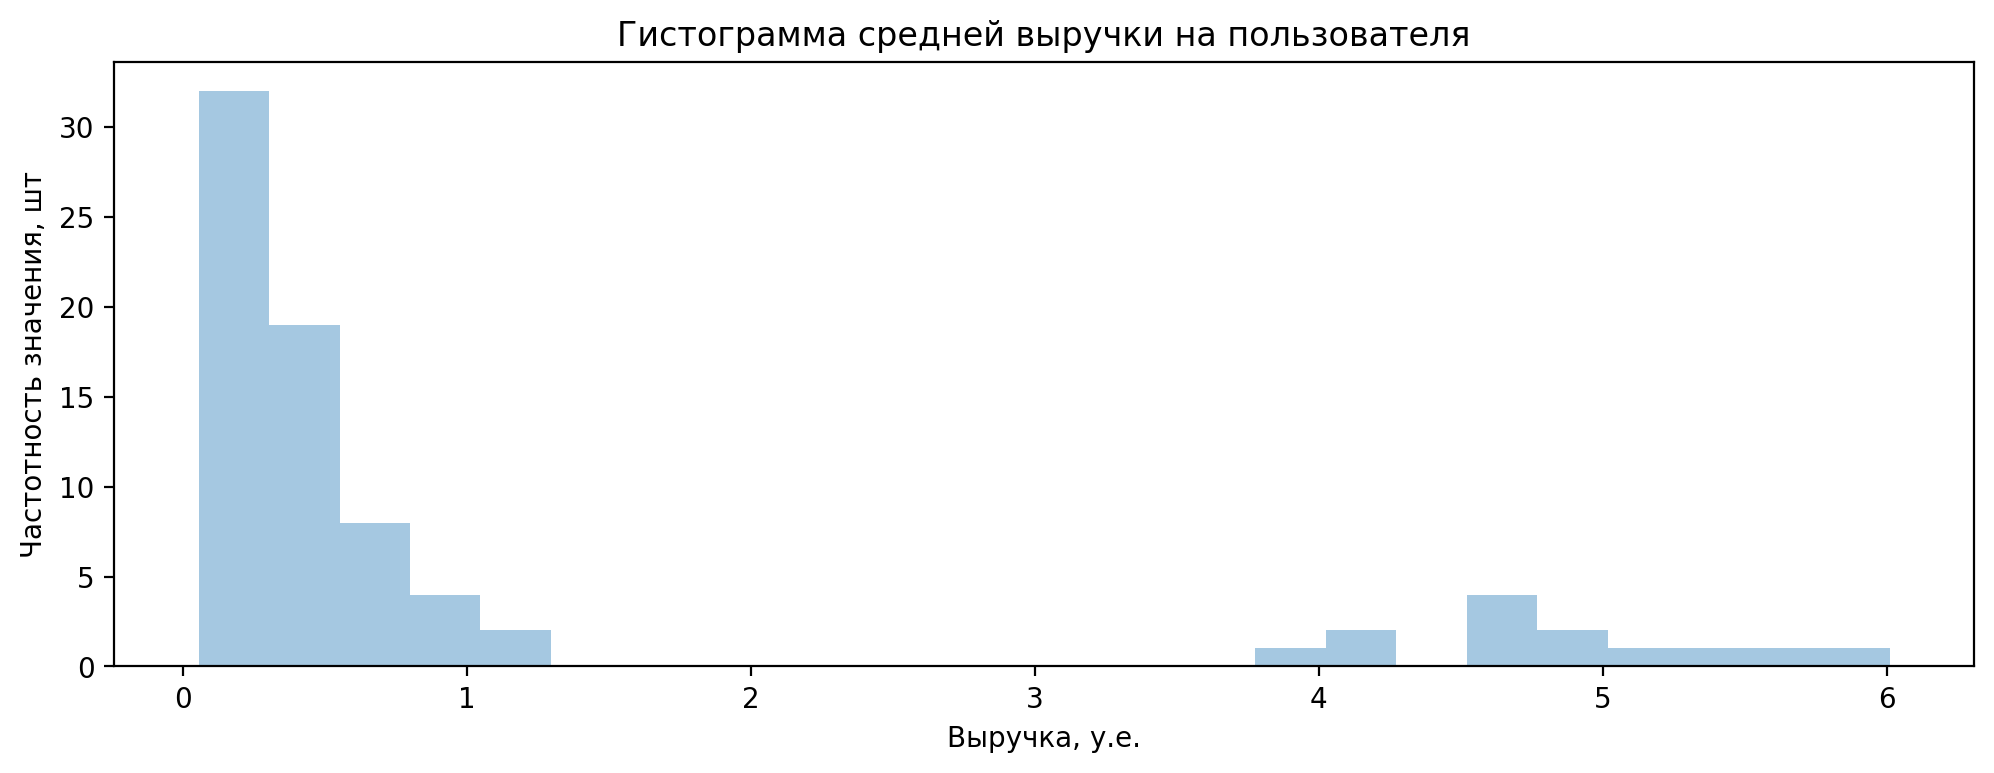

In [92]:
plt.figure(figsize=(12,4), dpi=200)
sns.distplot(cohort_o_gr_m['sum_buy_per_one_user'],kde=False)
plt.title('Гистограмма средней выручки на пользователя')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Выручка, у.е.')
plt.show()

Распредееление значений средней выручки показывает, что фактически у нас присутствует два распределения средней выручки:  
* распределение в первый месяц заказа;
* распределение в остальные месяцы (без учета первого месяца)  

Поэтому считать общую среднюю при данном виде распределения - не корректно и такое среднее не отразит фактическую ситуацию в сервисе.
В данной ситуации необходимо рассчитать отдельно среднее значение (как mean) для первого месяца когорты (lifetime=0) и медиану для всех других значений lifetime (медиану, поскольку распределение скошено влево)

In [93]:
# среднее значение (mean) в первый месяц когорты за весь период
round(cohort_o_gr_m[cohort_o_gr_m['lifetime'] == 0]['sum_buy_per_one_user'].mean(), 2)

4.92

In [94]:
# среднее значение (median) в  месяцы когорты (кроме первого) за весь период
round(cohort_o_gr_m[cohort_o_gr_m['lifetime'] != 0]['sum_buy_per_one_user'].median(), 2)

0.31

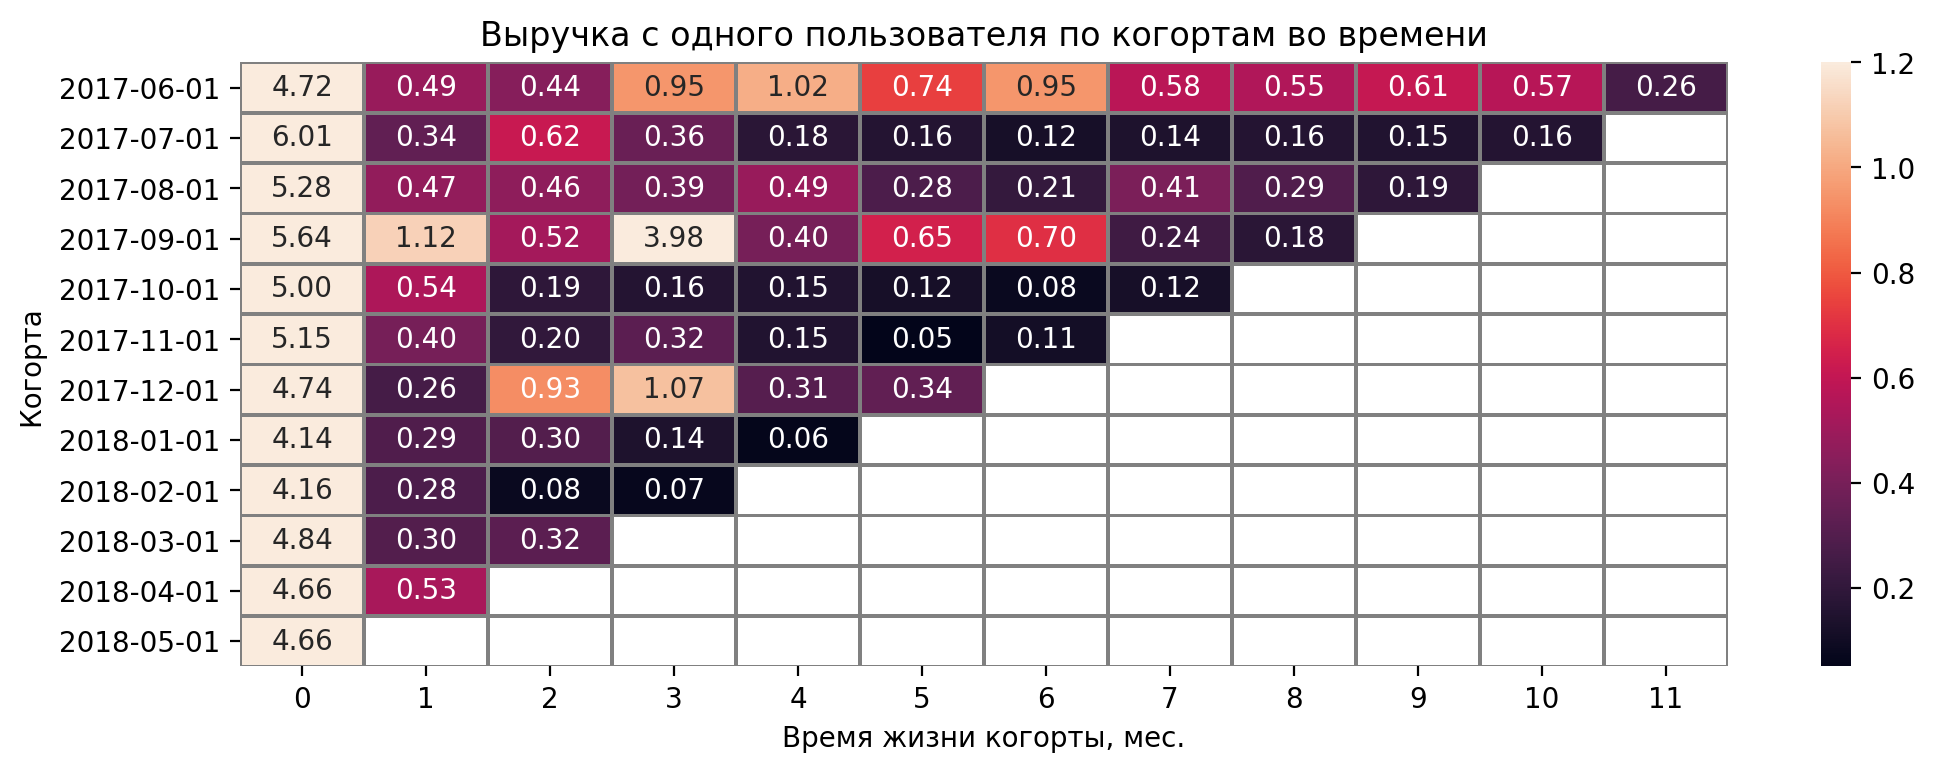

In [95]:
# создадим сводную таблицу для анализа средней выручки с пользователя во времени
cohort_sum_o_m = cohort_o_gr_m.pivot_table(index='first_buy_m', columns='lifetime', values= 'sum_buy_per_one_user').round(2)
cohort_sum_o_m.index = cohort_sum_o_m.index.strftime('%Y-%m-%d')
plt.figure(figsize=(12,4), dpi=200)
sns.heatmap(cohort_sum_o_m, vmax=1.2, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Выручка с одного пользователя по когортам во времени')
plt.ylabel('Когорта ')
plt.xlabel('Время жизни когорты, мес.')
plt.show()

#### 2.2.3.2.  Без деления на когорты<a name='step_2.2.3.2'></a>

In [96]:
df_o.head()

buy_ts  revenue                   uid      buy_m  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   

         first_buy_ts first_buy_m  lifetime  
0 2017-06-01 00:10:00  2017-06-01         0  
1 2017-06-01 00:25:00  2017-06-01         0  
2 2017-06-01 00:27:00  2017-06-01         0  
3 2017-06-01 00:29:00  2017-06-01         0  
4 2017-06-01 07:58:00  2017-06-01         0

In [97]:
#  рассчитаем суммарные значения  (общую выручку и количество уникальных клиентов) по каждому месяцу отдельно
mean_buy_month = df_o.groupby('buy_m').agg({'revenue': 'sum', 'uid':'nunique'}).reset_index()
mean_buy_month.columns = ['buy_m','sum_buy', 'count_u_users']
# средняя выручка с пользователя в месяц
mean_buy_month['sum_per_one_user'] = (mean_buy_month['sum_buy'] / mean_buy_month['count_u_users']).round(2)
mean_buy_month

buy_m   sum_buy  count_u_users  sum_per_one_user
0  2017-06-01   9557.49           2023              4.72
1  2017-07-01  12539.47           1984              6.32
2  2017-08-01   8758.78           1472              5.95
3  2017-09-01  18345.51           2750              6.67
4  2017-10-01  27987.70           4675              5.99
5  2017-11-01  27069.93           4547              5.95
6  2017-12-01  36388.60           4942              7.36
7  2018-01-01  19417.13           3898              4.98
8  2018-02-01  25560.54           4258              6.00
9  2018-03-01  28834.59           4181              6.90
10 2018-04-01  16858.06           2744              6.14
11 2018-05-01  20735.98           3544              5.85

In [98]:
#  рассчитаем среднее значение ежемесячной выручки на одного пользователя за все периоды 
round(mean_buy_month['sum_per_one_user'].mean(), 2)
print(f"Средняя выручка с пользователя = {round(mean_buy_month['sum_per_one_user'].mean(), 2)} у.е.")

Средняя выручка с пользователя = 6.07 у.е.


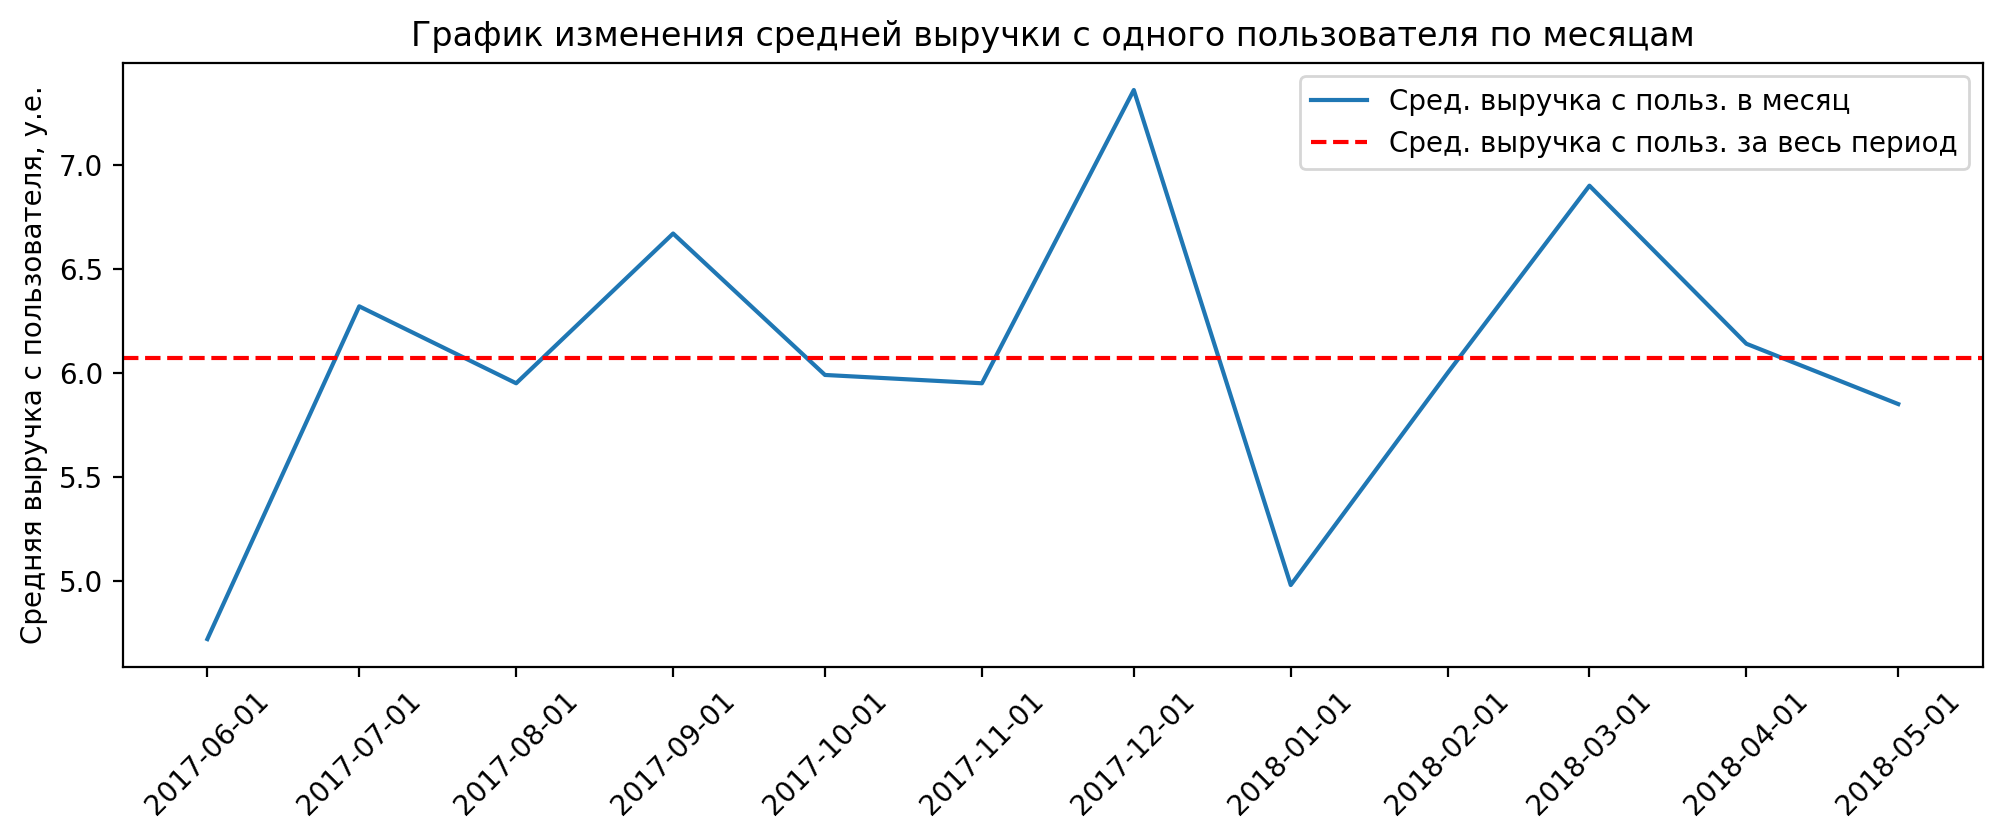

In [99]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x='buy_m', y='sum_per_one_user', data=mean_buy_month, label='Cред. выручка с польз. в месяц ')
plt.title('График изменения средней выручки с одного пользователя по месяцам')
plt.xlabel('')
plt.ylabel('Средняя выручка с пользователя, у.е.')
plt.xticks(ticks=mean_buy_month['buy_m'], rotation=45)
plt.axhline(round(mean_buy_month['sum_per_one_user'].mean(), 2),
            ls='--', c='r', label='Cред. выручка с польз. за весь период')
plt.legend()
plt.show()

#### Выводы по  2.2.3.  <a name='step_2.2.3v'></a>
#### С учетом когортного анализа
* Распределение данных имеет две вершины, поэтому отдельно рассчитывается среднее значение для первого месяца когорты и среднее значение для всех остальных месяцев.
* Для первого месяца когорт среднее значение выручки на одного пользователя 4.94 у.е.
* Для остальных месяцев когорт среднее значение - 0.28 у.е.
* Изменение во времени среднего значения выручки на пользователя в первый месяц имеет волнообразную форму по мере появления новых когорт.
* Изменение во времени среднего значения для остальных периодов жизни когорт имеет тенденцию к снижению по мере жизни когорты, причем достижение значений, стремящихся к 0 по мере появления новых когорт происходит в более короткий период.  
* В сентябрьской когоре для lifetime=3 наблюдается несвойственное большое (на порядок больше других) значение средней выручки (причины таких всплесков описаны в Дополнительнном выводе этого раздела).  

#### Без  когортного анализа   
* Средняя выручка с пользователя за весь период составляет 6.07 у.е.  
* В течении времени эта метрика имеет периоды роста и падений.В целом колебания происходят вокруг среднего значения, однако начало периода и его завершение характеризуются низкими значениями метрики (ниже среднего за период).  

#### Примечание: разница в значениях рассчитываемых с учетом когорт и без учета когорт объясняется разной методикой расчета показателей и свидетельстует о том, что средний чек повторной покупки больше, чем чек первичной покупки.  
#### Для подтверждения этого предположения рассчитаем средний чек покупки по когортам

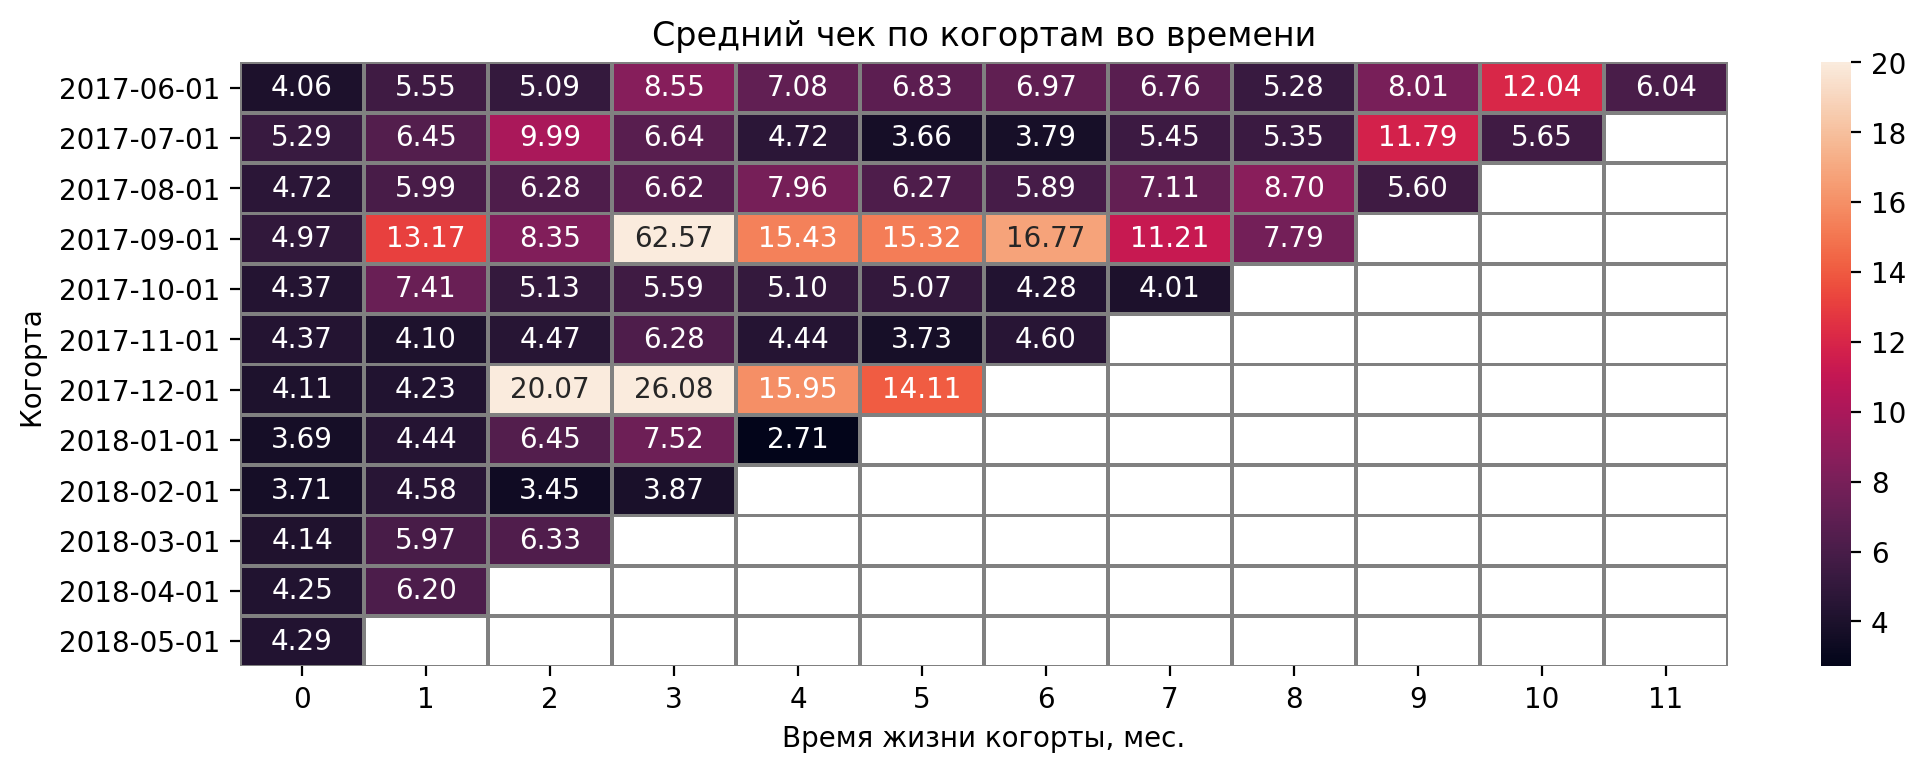

In [100]:
cohort_o_gr_m['avg_check'] = cohort_o_gr_m['sum_buy'] / cohort_o_gr_m['count_buy']
avg_check_cohort = cohort_o_gr_m.pivot_table(index='first_buy_m', columns='lifetime', values='avg_check').round(2)
avg_check_cohort.index = avg_check_cohort.index.strftime('%Y-%m-%d')
plt.figure(figsize=(12,4), dpi=200)
sns.heatmap(avg_check_cohort, vmax=20, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Средний чек по когортам во времени')
plt.ylabel('Когорта ')
plt.xlabel('Время жизни когорты, мес.')
plt.show()

#### Дополнительный вывод  
* Всплески средней выручки, наблюдаемые в тепловой карте когортного анализа средней выручки с пользователя объясняются тем, что в периоды жизни когорт (когда lifetime не равно "0") наблюдаются месяцы когда пользователи сервиса в рамках одной покупки приобретают либо очень большое количество билетов, либо приобретаются билеты на мероприятия, стоимость билетов на которые на порядок выше средней стоимости остальных билетов (для правильной траковки результата имеющихся данных не достаточно). Назовем эти покупки для дальнейшего упоминания как "оптовые".

#### 2.2.4.  Анализ накопительного LTV по когортам во времени<a name='step_2.2.4'></a>

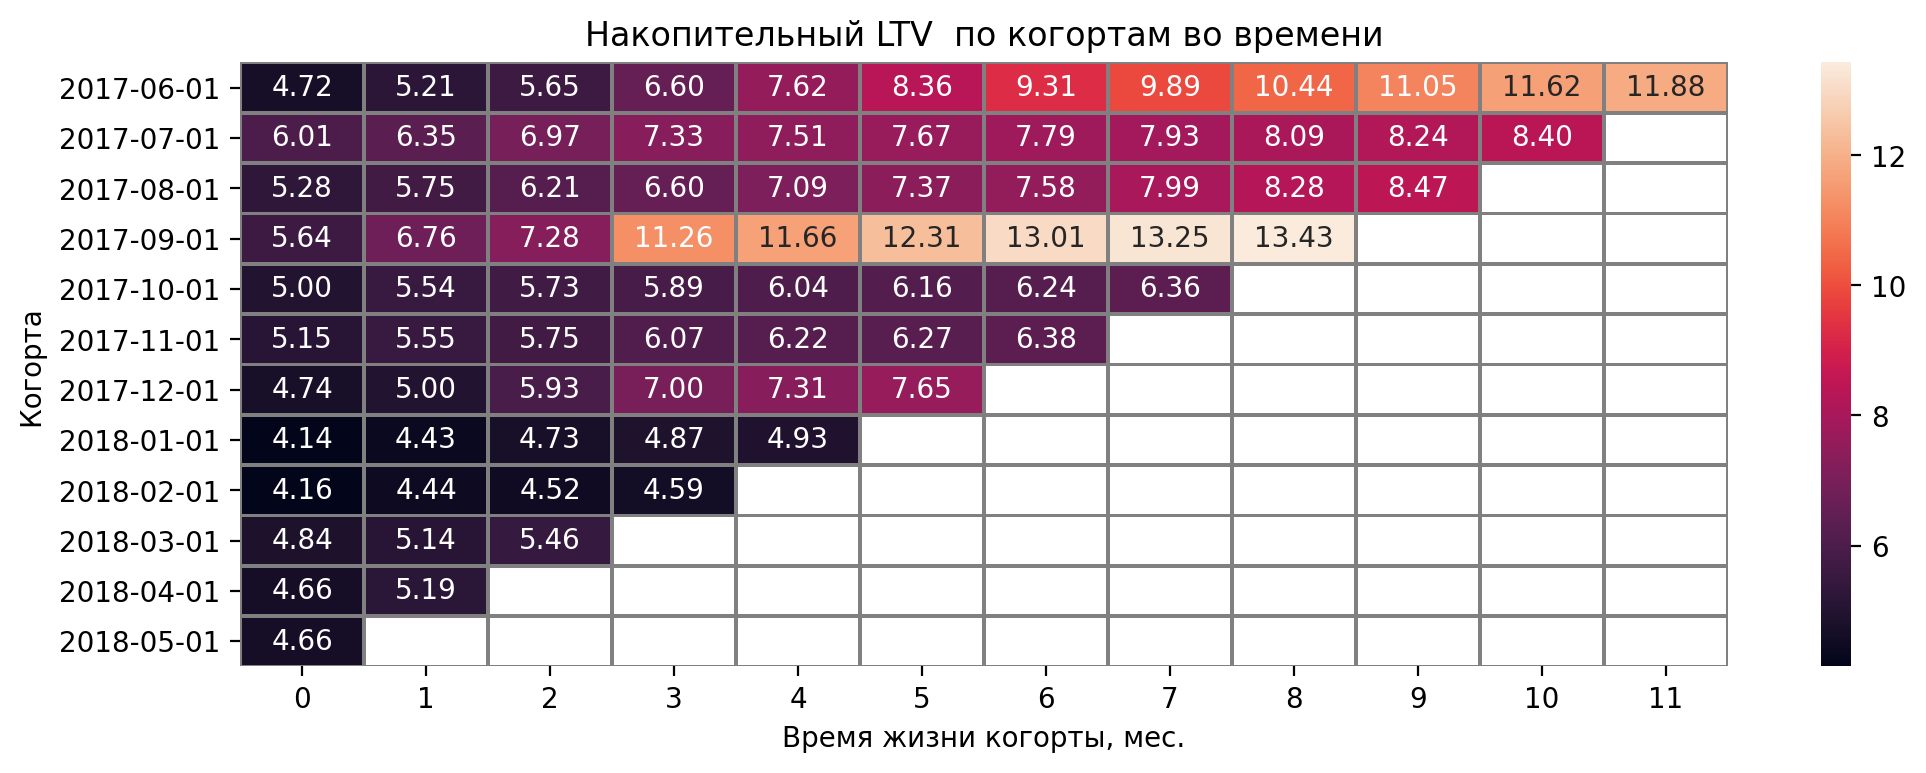

In [101]:
# используем ранее составленную сводную таблицу cohort_sum_o_m для изучения накопительного LTV
# выручка равна валовой прибыли т.к. маржинальность сервиса 100%
# для расчета накопительного lTV по когорта используем метод cumsum()
cohort_ltv_cum_m = cohort_sum_o_m.cumsum(axis=1)
plt.figure(figsize=(12,4), dpi=200)
sns.heatmap(cohort_ltv_cum_m, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Накопительный LTV  по когортам во времени')
plt.ylabel('Когорта ')
plt.xlabel('Время жизни когорты, мес.')
plt.show()

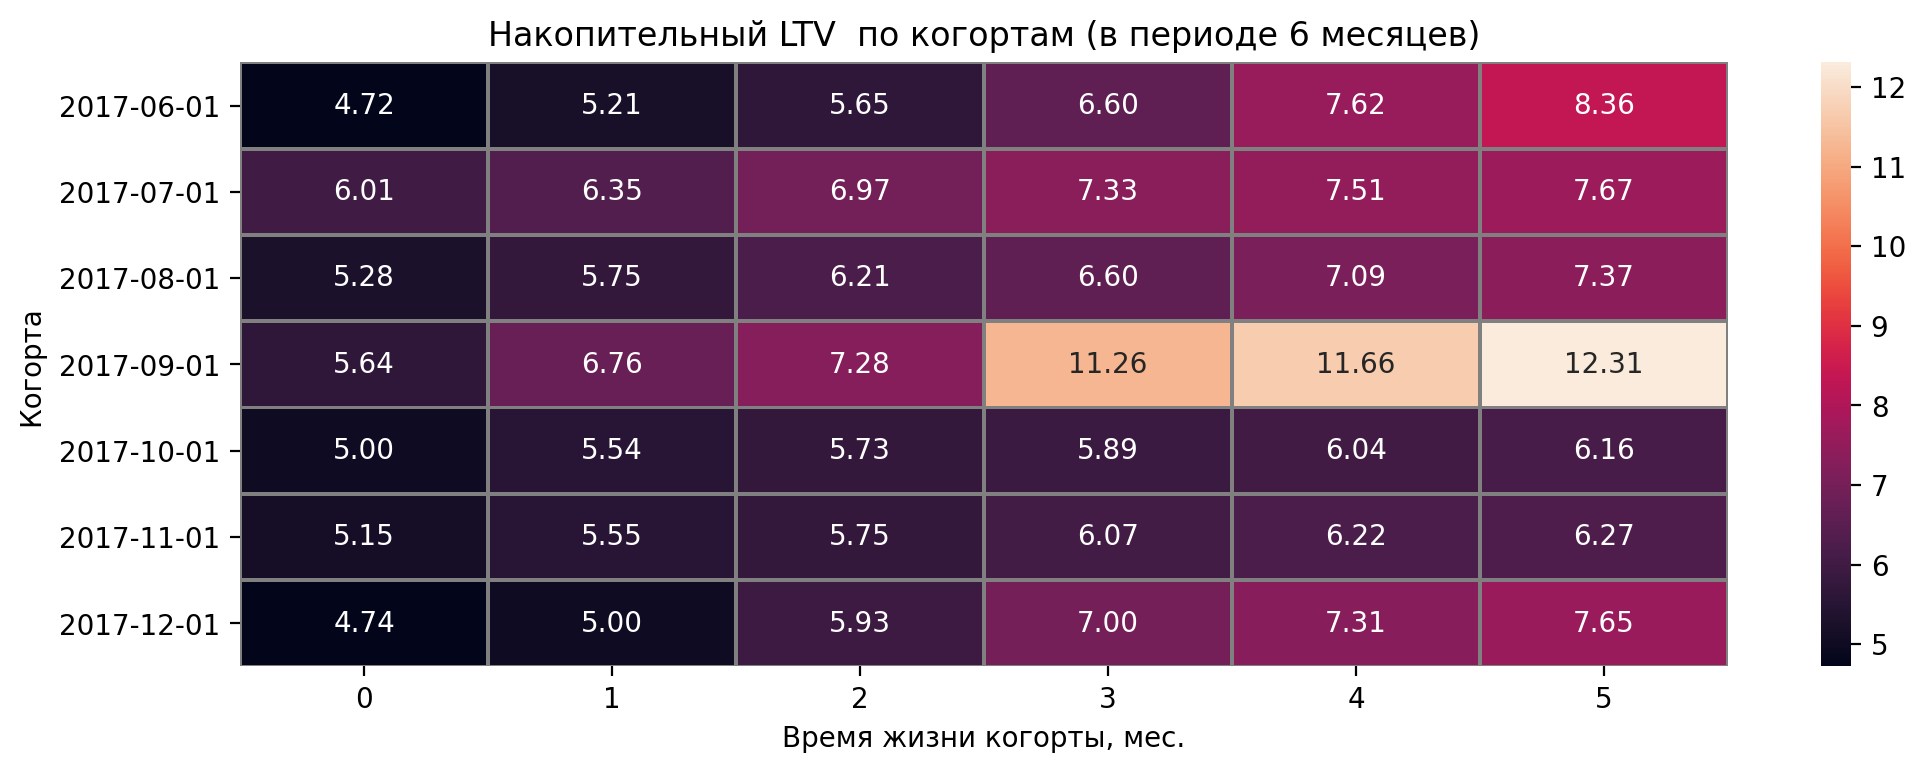

In [102]:
# ограничим накопительный LTV данными за полные 6 месяцев когор
cohort_ltv_cum_m = cohort_sum_o_m.cumsum(axis=1)
plt.figure(figsize=(12,4), dpi=200)
sns.heatmap(cohort_ltv_cum_m.loc[:'2017-12-01', '0':'5'], annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Накопительный LTV  по когортам (в периоде 6 месяцев)')
plt.ylabel('Когорта ')
plt.xlabel('Время жизни когорты, мес.')
plt.show()

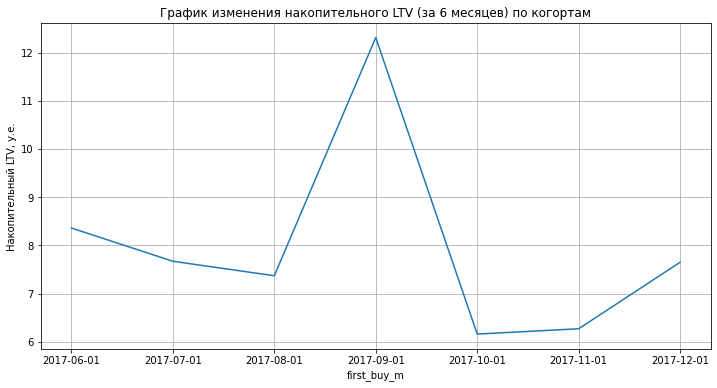

In [103]:

cohort_ltv_cum_m.loc[:'2017-12-01', '5':'5'].plot(grid=True, figsize=(12,6), legend=False)
plt.title('График изменения накопительного LTV (за 6 месяцев) по когортам')
plt.ylabel('Накопительный LTV, у.е.')
plt.show()

#### Выводы по  2.2.4.  <a name='step_2.2.4v'></a> 
* Накопительный LTV по когортам с появлением новых когор уменьшается (всплеск в сентябрьской когорте объясняется "оптовой" покупкой, что было рассмотрено выше в разделе "Выводы по 2.2.3."). Декабрь "особенный" месяц, поэтому не показателен.


### 2.3.  Маркетинговые метрики<a name='step_2.3'></a>

#### 2.3.1. Общая сумма расходов на маркетинг,  распределение расходов по источникам,  изменение распределения во времени<a name='step_2.3.1'></a>

In [104]:
print(f"Общая сумма расходов на маркетинг = {df_c['costs'].sum(): .2f} у.е.")

Общая сумма расходов на маркетинг =  329131.62 у.е.


In [105]:
# добавление столбца с датой в разрезе месяца в формате str и datetime
df_c['y_m_dt'] = df_c['dt'].dt.strftime('%Y-%m-01')
df_c['first_buy_m'] = df_c['dt'].astype('datetime64[M]')
df_c.sample(3)

source_id         dt   costs      y_m_dt first_buy_m
225           1 2018-01-12   54.48  2018-01-01  2018-01-01
1571          5 2017-09-28  186.56  2017-09-01  2017-09-01
1739          5 2018-03-15  127.64  2018-03-01  2018-03-01

In [106]:
# построение сводной таблицы с подитогами
mark_gr_s_t = df_c.pivot_table(index='source_id', columns='y_m_dt', values='costs', aggfunc='sum',  margins=True)
mark_gr_s_t

y_m_dt     2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
source_id                                                               
1             1125.61     1072.88      951.81     1502.01     2315.75   
2             2427.38     2333.11     1811.05     2985.66     4845.00   
3             7731.65     7674.37     6143.54     9963.55    15737.24   
4             3514.80     3529.73     3217.36     5192.26     6420.84   
5             2616.12     2998.14     2185.28     3849.14     5767.40   
9              285.22      302.54      248.93      415.62      609.41   
10             314.22      329.82      232.57      460.67      627.24   
All          18015.00    18240.59    14790.54    24368.91    36322.88   

y_m_dt     2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
source_id                                                               
1             2445.16     2341.20     2186.18     2204.48     1893.09   
2             5247.68     4897.80     4157.74     4474.34     3943.14   
3            17025.34    16219.52    14808.78    14228.56    13080.85   
4             5388.82     7680.47     5832.79     5711.96     5961.87   
5             6325.34     5872.52     5371.52     5071.31     4529.62   
9              683.18      657.98      547.16      551.50      480.29   
10             792.36      645.86      614.35      480.88      526.41   
All          37907.88    38315.35    33518.52    32723.03    30415.27   

y_m_dt     2018-04-01  2018-05-01        All  
source_id                                     
1             1327.49     1467.61   20833.27  
2             2993.70     2689.44   42806.04  
3             9296.81     9411.42  141321.63  
4             4408.49     4214.21   61073.60  
5             3501.15     3669.56   51757.10  
9              373.49      362.17    5517.49  
10             388.25      409.86    5822.49  
All          22289.38    22224.27  329131.62

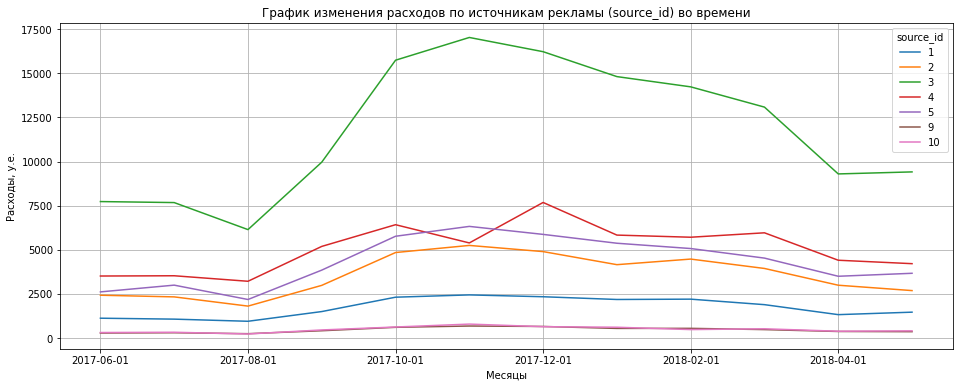

In [107]:
mark_gr_s_t.loc[[1, 2, 3, 4, 5, 9, 10], '2017-06-01':'2018-05-01'].T.plot(grid=True, figsize=(16,6))
plt.title('График изменения расходов по источникам рекламы (source_id) во времени')
plt.ylabel('Расходы, у.е.')
plt.xlabel('Месяцы')
plt.show()

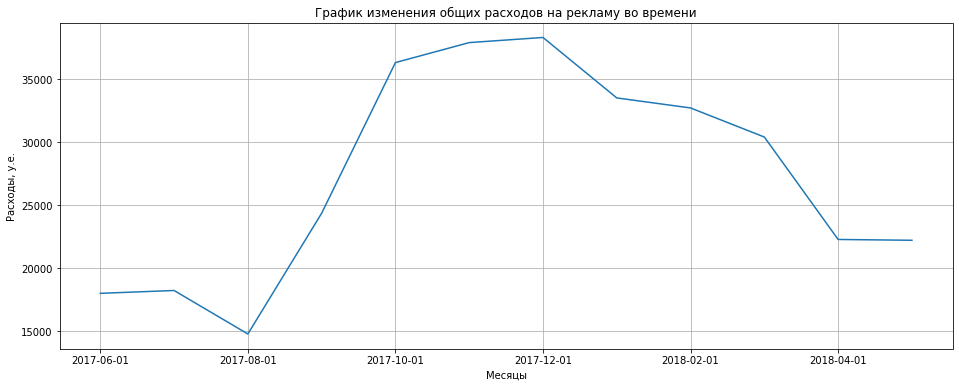

In [108]:
mark_gr_s_t.loc['All', '2017-06-01':'2018-05-01'].T.plot(grid=True, figsize=(16,6))
plt.title('График изменения общих расходов на рекламу во времени')
plt.ylabel('Расходы, у.е.')
plt.xlabel('Месяцы')
plt.show()

#### Выводы по  2.3.1.  <a name='step_2.3.1v'></a>  
* Общая сумма расходов на маркетинг =  329_131.62 у.е.
* Расходы на рекламу по источникам распределены неравномерно и выделяется источкик 3, расходы на который превышает все остальные источники в разы.  
* Динамика изменения расходов представлена на графиках.
* В связи с тем, что расходы на источник 3 превышают все остальные расходы по источникам, динамика общих расходов на рекламу соответсвует динамике расходов источника 3.

#### 2.3.2.  CAC<a name='step_2.3.2'></a>

In [109]:
# справочник количества уникальных посетителей в месяц
ses_cnt_uuser_grby_sour_month = df_v.groupby(['source_id', 'ses_m_dt']).agg({'uid': 'nunique'}).reset_index()
ses_cnt_uuser_grby_sour_month = (ses_cnt_uuser_grby_sour_month
                                 .rename(columns={'ses_m_dt': 'first_buy_m' , 'uid': 'cnt_un_users_ses'}))
ses_cnt_uuser_grby_sour_month.head(10)

source_id first_buy_m  cnt_un_users_ses
0          1  2017-06-01               972
1          1  2017-07-01              1047
2          1  2017-08-01               794
3          1  2017-09-01              1395
4          1  2017-10-01              2170
5          1  2017-11-01              2790
6          1  2017-12-01              2735
7          1  2018-01-01              2142
8          1  2018-02-01              2121
9          1  2018-03-01              2289

In [110]:
# справочник источников и устройств первой сессии для пользователей
first_ses_source_device_by_users = (df_v.loc[(df_v['start_ts'] == df_v['first_ses_ts']),
                                              ['uid', 'source_id', 'device']])
first_ses_source_device_by_users

uid  source_id   device
0       16879256277535980062          4    touch
1         104060357244891740          2  desktop
2        7459035603376831527          5    touch
4        9969694820036681168          3  desktop
5       16007536194108375387          5  desktop
...                      ...        ...      ...
359395  18363291481961487539          2  desktop
359396  18370831553019119586          1    touch
359397  18387297585500748294          4  desktop
359398  18388616944624776485          5  desktop
359399  18396128934054549559          2    touch

[228170 rows x 3 columns]

In [111]:
# проверим строки на уникальность по uid
uid_prodlem = first_ses_source_device_by_users['uid'].duplicated()
first_ses_source_device_by_users[uid_prodlem]['uid']

47067    1981020429381477763
Name: uid, dtype: uint64

In [112]:
# "изучим глазами", что не так с этим uid
df_v[df_v['uid'] == 1981020429381477763]

device              end_ts  source_id            start_ts  \
44993  touch 2018-03-16 08:57:00          1 2018-03-16 08:55:00   
47067  touch 2018-03-16 08:55:00          1 2018-03-16 08:55:00   

                       uid    ses_m ses_w      ses_d   ses_m_dt  \
44993  1981020429381477763  2018-03  1811 2018-03-16 2018-03-01   
47067  1981020429381477763  2018-03  1811 2018-03-16 2018-03-01   

       ses_duration_sec        first_ses_ts  first_ses_w first_ses_m  \
44993               120 2018-03-16 08:55:00         1811  2018-03-01   
47067                 0 2018-03-16 08:55:00         1811  2018-03-01   

      first_ses_d  lifetime  
44993  2018-03-16         0  
47067  2018-03-16         0

У этого пользователя две сессии начинаются одновременно , но одна нулевой длительности, другая 120 секунд device и source_id, совпадают, поэтому одну из этих строк удаляем (для этого используем полученную ранее логическую маску).  
Примечание: Необходимо информировать о данном инциденте ответственных сотрудников для принятия мер.

In [113]:
first_ses_source_device_by_users = first_ses_source_device_by_users[~uid_prodlem]
len(first_ses_source_device_by_users)

228169

In [114]:
# добавим в таблицу заказов информацию об источниках и устройстве первой сессии
# для этого соединим таблицы по uid
df_o = df_o.merge(first_ses_source_device_by_users, on='uid')
df_o.head()

buy_ts  revenue                   uid      buy_m  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   

         first_buy_ts first_buy_m  lifetime  source_id   device  
0 2017-06-01 00:10:00  2017-06-01         0          1  desktop  
1 2017-06-01 00:25:00  2017-06-01         0          2  desktop  
2 2017-06-01 00:27:00  2017-06-01         0          2  desktop  
3 2017-06-01 00:29:00  2017-06-01         0          2  desktop  
4 2017-06-01 07:58:00  2017-06-01         0          3  desktop

In [115]:
# группировка данных для когортного анализа
group_by_source = (df_o.groupby(['source_id', 'first_buy_m', 'lifetime'])
                 .agg({'revenue': 'sum', 'uid': ['count', 'nunique']})
                 .reset_index())
group_by_source.columns = ['source_id', 'first_buy_m', 'lifetime', 'sum_buy', 'count_buy', 'count_un_users_buy']
group_by_source.head()

source_id first_buy_m  lifetime  sum_buy  count_buy  count_un_users_buy
0          1  2017-06-01         0  1378.70        268                 190
1          1  2017-06-01         1   414.98         80                  16
2          1  2017-06-01         2   419.43         87                  10
3          1  2017-06-01         3   714.24        119                   9
4          1  2017-06-01         4   811.20        114                  12

In [116]:
# справочник количества пользователей в когорте, разбитых по источникам
coutn_users_cohort_by_source = (group_by_source[group_by_source['lifetime'] == 0]
                                [['source_id', 'first_buy_m', 'count_un_users_buy']])
coutn_users_cohort_by_source = coutn_users_cohort_by_source.rename(columns={'count_un_users_buy': 'count_users_in_cohort'})
coutn_users_cohort_by_source.head()

source_id first_buy_m  count_users_in_cohort
0           1  2017-06-01                    190
12          1  2017-07-01                    160
23          1  2017-08-01                    113
33          1  2017-09-01                    227
42          1  2017-10-01                    340

In [117]:
group_by_source = group_by_source.merge(coutn_users_cohort_by_source, on=['source_id', 'first_buy_m'])
group_by_source.head()

source_id first_buy_m  lifetime  sum_buy  count_buy  count_un_users_buy  \
0          1  2017-06-01         0  1378.70        268                 190   
1          1  2017-06-01         1   414.98         80                  16   
2          1  2017-06-01         2   419.43         87                  10   
3          1  2017-06-01         3   714.24        119                   9   
4          1  2017-06-01         4   811.20        114                  12   

   count_users_in_cohort  
0                    190  
1                    190  
2                    190  
3                    190  
4                    190

In [118]:
# добавим количество уникальных сессий в когорты
group_by_source = group_by_source.merge(ses_cnt_uuser_grby_sour_month,on=['source_id', 'first_buy_m'])
group_by_source.head()

source_id first_buy_m  lifetime  sum_buy  count_buy  count_un_users_buy  \
0          1  2017-06-01         0  1378.70        268                 190   
1          1  2017-06-01         1   414.98         80                  16   
2          1  2017-06-01         2   419.43         87                  10   
3          1  2017-06-01         3   714.24        119                   9   
4          1  2017-06-01         4   811.20        114                  12   

   count_users_in_cohort  cnt_un_users_ses  
0                    190               972  
1                    190               972  
2                    190               972  
3                    190               972  
4                    190               972

In [119]:
# справочник расходов по месяцам  и по источникам
cost_sum_grby_sour_month = df_c.groupby(['source_id', 'first_buy_m']).agg({'costs': 'sum'}).reset_index()
cost_sum_grby_sour_month.head()

source_id first_buy_m    costs
0          1  2017-06-01  1125.61
1          1  2017-07-01  1072.88
2          1  2017-08-01   951.81
3          1  2017-09-01  1502.01
4          1  2017-10-01  2315.75

In [120]:
# добавим расходы по источникам и по месяцам в таблицу group_by_source
group_by_source = group_by_source.merge(cost_sum_grby_sour_month, on=['source_id', 'first_buy_m'])
group_by_source.head()

source_id first_buy_m  lifetime  sum_buy  count_buy  count_un_users_buy  \
0          1  2017-06-01         0  1378.70        268                 190   
1          1  2017-06-01         1   414.98         80                  16   
2          1  2017-06-01         2   419.43         87                  10   
3          1  2017-06-01         3   714.24        119                   9   
4          1  2017-06-01         4   811.20        114                  12   

   count_users_in_cohort  cnt_un_users_ses    costs  
0                    190               972  1125.61  
1                    190               972  1125.61  
2                    190               972  1125.61  
3                    190               972  1125.61  
4                    190               972  1125.61

In [121]:
# расчитаем CAC на покупателя в когорте и на пользователя сессий
group_by_source['cac_buy'] = (group_by_source['costs'] / group_by_source['count_users_in_cohort']).round(2)
group_by_source['cac_ses'] = (group_by_source['costs'] / group_by_source['cnt_un_users_ses']).round(2)
group_by_source['first_buy_m'] = group_by_source['first_buy_m'].dt.strftime('%Y-%m-%d')
group_by_source.head()

source_id first_buy_m  lifetime  sum_buy  count_buy  count_un_users_buy  \
0          1  2017-06-01         0  1378.70        268                 190   
1          1  2017-06-01         1   414.98         80                  16   
2          1  2017-06-01         2   419.43         87                  10   
3          1  2017-06-01         3   714.24        119                   9   
4          1  2017-06-01         4   811.20        114                  12   

   count_users_in_cohort  cnt_un_users_ses    costs  cac_buy  cac_ses  
0                    190               972  1125.61     5.92     1.16  
1                    190               972  1125.61     5.92     1.16  
2                    190               972  1125.61     5.92     1.16  
3                    190               972  1125.61     5.92     1.16  
4                    190               972  1125.61     5.92     1.16

In [122]:
group_by_source_cac = (group_by_source[group_by_source['lifetime'] == 0]
                      [['source_id', 'first_buy_m', 'cac_buy', 'cac_ses']])
group_by_source_cac

source_id first_buy_m  cac_buy  cac_ses
0            1  2017-06-01     5.92     1.16
12           1  2017-07-01     6.71     1.02
23           1  2017-08-01     8.42     1.20
33           1  2017-09-01     6.62     1.08
42           1  2017-10-01     6.81     1.07
..         ...         ...      ...      ...
503         10  2018-01-01     6.68     0.66
506         10  2018-02-01     3.91     0.44
509         10  2018-03-01     2.83     0.45
512         10  2018-04-01     3.63     0.64
513         10  2018-05-01     3.15     0.53

[84 rows x 4 columns]

In [123]:
# создадим сводную таблицу для наглядного отображения данных отдельно по каждому CAC (покупатели и посетители)
# ПОКУПАТЕЛИ
report_cac_buy = group_by_source_cac.pivot_table(index='source_id', columns='first_buy_m', values='cac_buy')
report_cac_buy['avg'] = round(report_cac_buy.mean(axis=1), 2)
report_cac_buy


first_buy_m  2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
source_id                                                                 
1                  5.92        6.71        8.42        6.62        6.81   
2                 10.33       11.22       14.72       13.51       12.23   
3                 12.12       14.99       18.23       12.76       13.66   
4                  8.51        6.83        9.52        8.80        5.48   
5                  6.81        7.09        6.07        6.54        6.10   
9                  4.19        5.82        4.08        4.78        4.84   
10                 3.31        6.47        6.29        5.36        3.00   

first_buy_m  2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
source_id                                                                 
1                  7.55        7.07        9.19        8.02        6.74   
2                 13.19       12.86       14.24       15.27       11.70   
3                 14.00       12.32       14.72       13.03       13.64   
4                  4.58        5.58        5.65        5.16        5.52   
5                  9.13        7.62        8.49        7.48        8.58   
9                  4.71        5.44        6.84        6.57        2.98   
10                 6.19        7.60        6.68        3.91        2.83   

first_buy_m  2018-04-01  2018-05-01    avg  
source_id                                   
1                  7.42        6.09   7.21  
2                 14.26        6.53  12.50  
3                 15.02       11.15  13.80  
4                  6.41        5.24   6.44  
5                  8.14        7.38   7.45  
9                  8.69        6.04   5.42  
10                 3.63        3.15   4.87

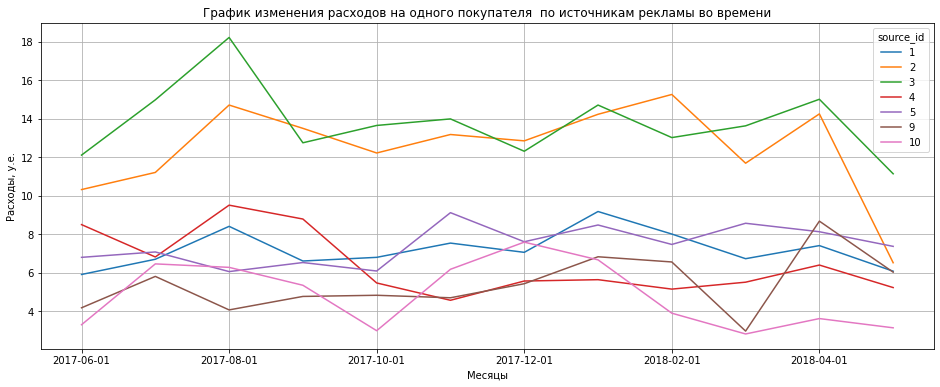

In [124]:
report_cac_buy.loc[:, '2017-06-01':'2018-05-01'].T.plot(grid=True, figsize=(16,6))
plt.title('График изменения расходов на одного покупателя  по источникам рекламы во времени')
plt.ylabel('Расходы, у.е.')
plt.xlabel('Месяцы')
plt.show()

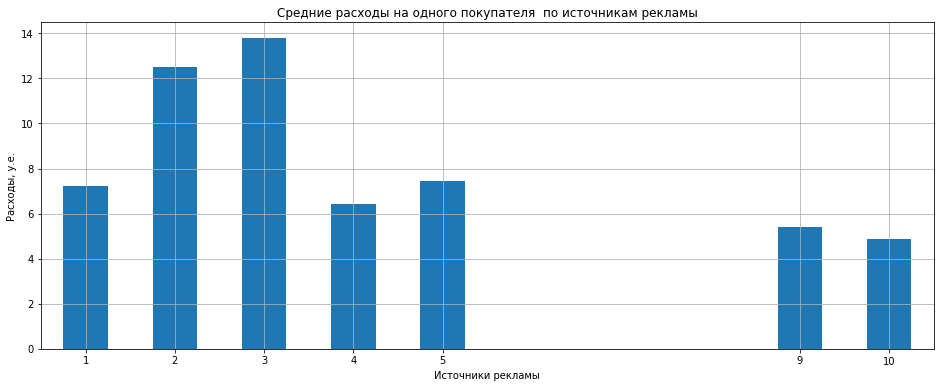

In [125]:
report_cac_buy.loc[:, 'avg'].sort_values(ascending=False).plot(grid=True, kind='bar', figsize=(16,6))
plt.title('Средние расходы на одного покупателя  по источникам рекламы')
plt.ylabel('Расходы, у.е.')
plt.xlabel('Источники рекламы')
plt.xticks(rotation=1)
plt.show()

In [126]:
# ПОСЕТИТЕЛИ
report_cac_ses = group_by_source_cac.pivot_table(index='source_id', columns='first_buy_m', values='cac_ses')
report_cac_ses['avg'] = round(report_cac_ses.mean(axis=1), 2)
report_cac_ses

first_buy_m  2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
source_id                                                                 
1                  1.16        1.02        1.20        1.08        1.07   
2                  1.58        1.31        1.42        1.40        1.45   
3                  1.83        1.89        1.80        1.71        1.84   
4                  0.97        0.86        1.03        0.97        0.67   
5                  0.90        0.80        0.69        0.78        0.77   
9                  0.38        0.54        0.41        0.53        0.58   
10                 0.74        1.04        0.95        0.92        0.68   

first_buy_m  2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
source_id                                                                 
1                  0.88        0.86        1.02        1.04        0.83   
2                  1.25        1.32        1.31        1.42        1.18   
3                  1.67        1.76        1.74        1.64        1.72   
4                  0.48        0.65        0.57        0.59        0.61   
5                  0.97        0.94        0.94        0.85        0.98   
9                  0.46        0.53        0.52        0.53        0.27   
10                 0.89        1.04        0.66        0.44        0.45   

first_buy_m  2018-04-01  2018-05-01   avg  
source_id                                  
1                  0.82        0.84  0.98  
2                  1.24        0.91  1.32  
3                  1.70        1.76  1.76  
4                  0.60        0.58  0.72  
5                  0.71        0.91  0.85  
9                  0.50        0.48  0.48  
10                 0.64        0.53  0.75

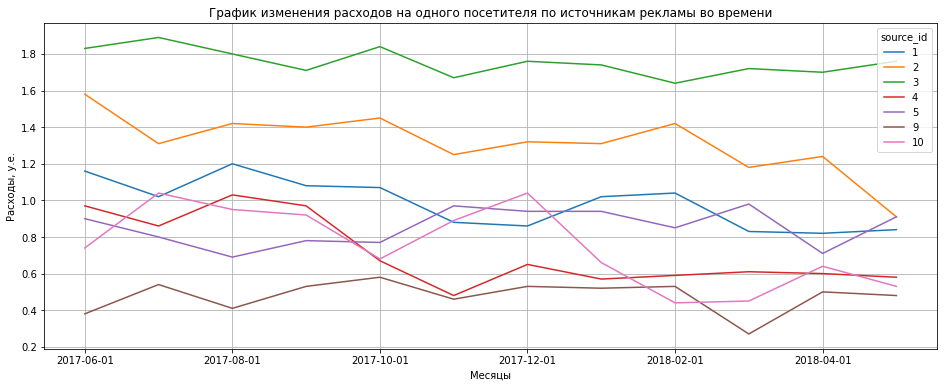

In [127]:
report_cac_ses.loc[:, '2017-06-01':'2018-05-01'].T.plot(grid=True, figsize=(16,6))
plt.title('График изменения расходов на одного посетителя по источникам рекламы во времени')
plt.ylabel('Расходы, у.е.')
plt.xlabel('Месяцы')
plt.show()

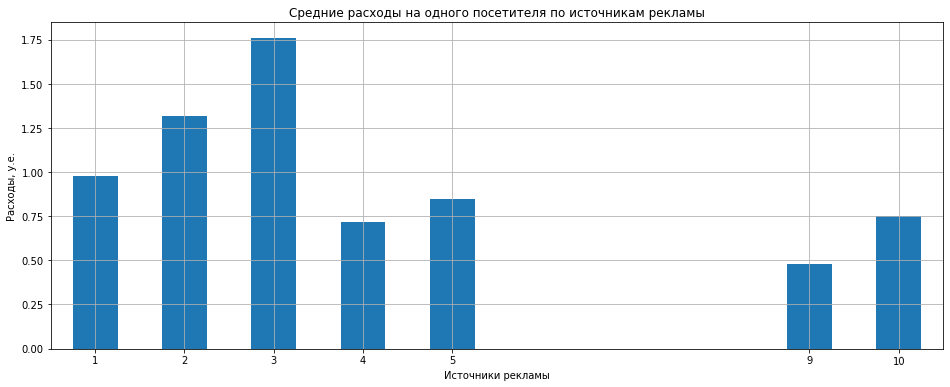

In [128]:
report_cac_ses.loc[:, 'avg'].sort_values(ascending=False).plot(grid=True, kind='bar', figsize=(16,6))
plt.title('Средние расходы на одного посетителя по источникам рекламы')
plt.ylabel('Расходы, у.е.')
plt.xlabel('Источники рекламы')
plt.xticks(rotation=1)
plt.show()

#### Выводы по  2.3.2.  <a name='step_2.3.2v'></a>
Источники рекламы имеют разные расходы и приносят сервису разное количество покупателей и средние расходы на одного покупателя имею разные значения.  
Наибольшая стоимость привлечения у источника 3 (у этого источника самые больше абсолютные расходы).  
Нименьшая стоимость привлечения у источника 10 (при этом у него самые низкие абсолютные расходы).  
Если рассматривать расходы в пересчете на посетители то в отношении источника 3 картина не меняется, а наименьшие расходы у источника 9 (это свидетельствует, что из для источника 9 конверсия в покупку хуже).

#### 2.3.3.  ROMI по когортам в разрезе источников<a name='step_2.3.3'></a>

In [129]:
group_by_source.head()

source_id first_buy_m  lifetime  sum_buy  count_buy  count_un_users_buy  \
0          1  2017-06-01         0  1378.70        268                 190   
1          1  2017-06-01         1   414.98         80                  16   
2          1  2017-06-01         2   419.43         87                  10   
3          1  2017-06-01         3   714.24        119                   9   
4          1  2017-06-01         4   811.20        114                  12   

   count_users_in_cohort  cnt_un_users_ses    costs  cac_buy  cac_ses  
0                    190               972  1125.61     5.92     1.16  
1                    190               972  1125.61     5.92     1.16  
2                    190               972  1125.61     5.92     1.16  
3                    190               972  1125.61     5.92     1.16  
4                    190               972  1125.61     5.92     1.16

In [130]:
# расчет LTV ROMI и добавление столбца в таблицу
group_by_source['ltv'] = group_by_source['sum_buy'] / group_by_source['count_users_in_cohort']
group_by_source['romi'] = group_by_source['ltv'] / group_by_source['cac_buy']
group_by_source

source_id first_buy_m  lifetime  sum_buy  count_buy  count_un_users_buy  \
0            1  2017-06-01         0  1378.70        268                 190   
1            1  2017-06-01         1   414.98         80                  16   
2            1  2017-06-01         2   419.43         87                  10   
3            1  2017-06-01         3   714.24        119                   9   
4            1  2017-06-01         4   811.20        114                  12   
..         ...         ...       ...      ...        ...                 ...   
509         10  2018-03-01         0   638.44        218                 186   
510         10  2018-03-01         1    12.71          5                   5   
511         10  2018-03-01         2     6.29          3                   3   
512         10  2018-04-01         0   261.93        112                 107   
513         10  2018-05-01         0   470.89        144                 130   

     count_users_in_cohort  cnt_un_users_ses    costs  cac_buy  cac_ses  \
0                      190               972  1125.61     5.92     1.16   
1                      190               972  1125.61     5.92     1.16   
2                      190               972  1125.61     5.92     1.16   
3                      190               972  1125.61     5.92     1.16   
4                      190               972  1125.61     5.92     1.16   
..                     ...               ...      ...      ...      ...   
509                    186              1167   526.41     2.83     0.45   
510                    186              1167   526.41     2.83     0.45   
511                    186              1167   526.41     2.83     0.45   
512                    107               603   388.25     3.63     0.64   
513                    130               777   409.86     3.15     0.53   

          ltv      romi  
0    7.256316  1.225729  
1    2.184105  0.368937  
2    2.207526  0.372893  
3    3.759158  0.634993  
4    4.269474  0.721195  
..        ...       ...  
509  3.432473  1.212888  
510  0.068333  0.024146  
511  0.033817  0.011950  
512  2.447944  0.674365  
513  3.622231  1.149915  

[514 rows x 13 columns]

In [131]:
report_romi = (group_by_source.pivot_table(index=['source_id', 'first_buy_m'], columns='lifetime', values='romi')
               .cumsum(axis=1).round(2))
report_romi.head(15)

lifetime                 0     1     2     3     4     5     6     7     8   \
source_id first_buy_m                                                         
1         2017-06-01   1.23  1.59  1.97  2.60  3.32  3.67  4.11  4.53  4.92   
          2017-07-01   1.09  1.25  2.05  2.27  2.40  2.54  2.60  2.70  2.83   
          2017-08-01   0.89  1.03  1.15  1.27  1.39  1.47  1.55  1.87  2.13   
          2017-09-01   0.91  1.18  1.27  1.40  1.41  1.43  1.44  1.48  1.57   
          2017-10-01   0.88  1.04  1.07  1.13  1.14  1.16  1.18  1.23   NaN   
          2017-11-01   0.98  1.05  1.18  1.30  1.32  1.34  1.35   NaN   NaN   
          2017-12-01   0.65  0.69  0.73  0.77  0.77  0.79   NaN   NaN   NaN   
          2018-01-01   0.63  0.64  0.65  0.76  0.76   NaN   NaN   NaN   NaN   
          2018-02-01   0.58  0.71  0.72  0.76   NaN   NaN   NaN   NaN   NaN   
          2018-03-01   1.39  1.67  1.79   NaN   NaN   NaN   NaN   NaN   NaN   
          2018-04-01   0.63  0.67   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2018-05-01   0.86   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2         2017-06-01   0.43  0.48  0.50  0.69  0.85  0.94  1.10  1.24  1.37   
          2017-07-01   0.75  0.82  0.82  0.85  0.89  0.91  0.94  0.95  0.96   
          2017-08-01   0.39  0.45  0.47  0.48  0.52  0.52  0.53  0.56  0.56   

lifetime                 9     10    11  
source_id first_buy_m                    
1         2017-06-01   5.20  5.40  5.68  
          2017-07-01   2.98  3.11   NaN  
          2017-08-01   2.22   NaN   NaN  
          2017-09-01    NaN   NaN   NaN  
          2017-10-01    NaN   NaN   NaN  
          2017-11-01    NaN   NaN   NaN  
          2017-12-01    NaN   NaN   NaN  
          2018-01-01    NaN   NaN   NaN  
          2018-02-01    NaN   NaN   NaN  
          2018-03-01    NaN   NaN   NaN  
          2018-04-01    NaN   NaN   NaN  
          2018-05-01    NaN   NaN   NaN  
2         2017-06-01   1.44  1.57  1.61  
          2017-07-01   0.98  1.01   NaN  
          2017-08-01   0.56   NaN   NaN

In [132]:
source_num = report_romi.index.get_level_values(0).unique()

In [133]:
# определение функции для построения когортного анализа в разрезе источников
def cohort_plot_source(num):
    plt.figure(figsize=(12,4), dpi=200)
    sns.heatmap(report_romi.loc[num], annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    plt.title('ROMI по когортам для источника %s' % num)
    plt.ylabel('Когорта ')
    plt.xlabel('Время жизни когорты, мес.')
    plt.show()

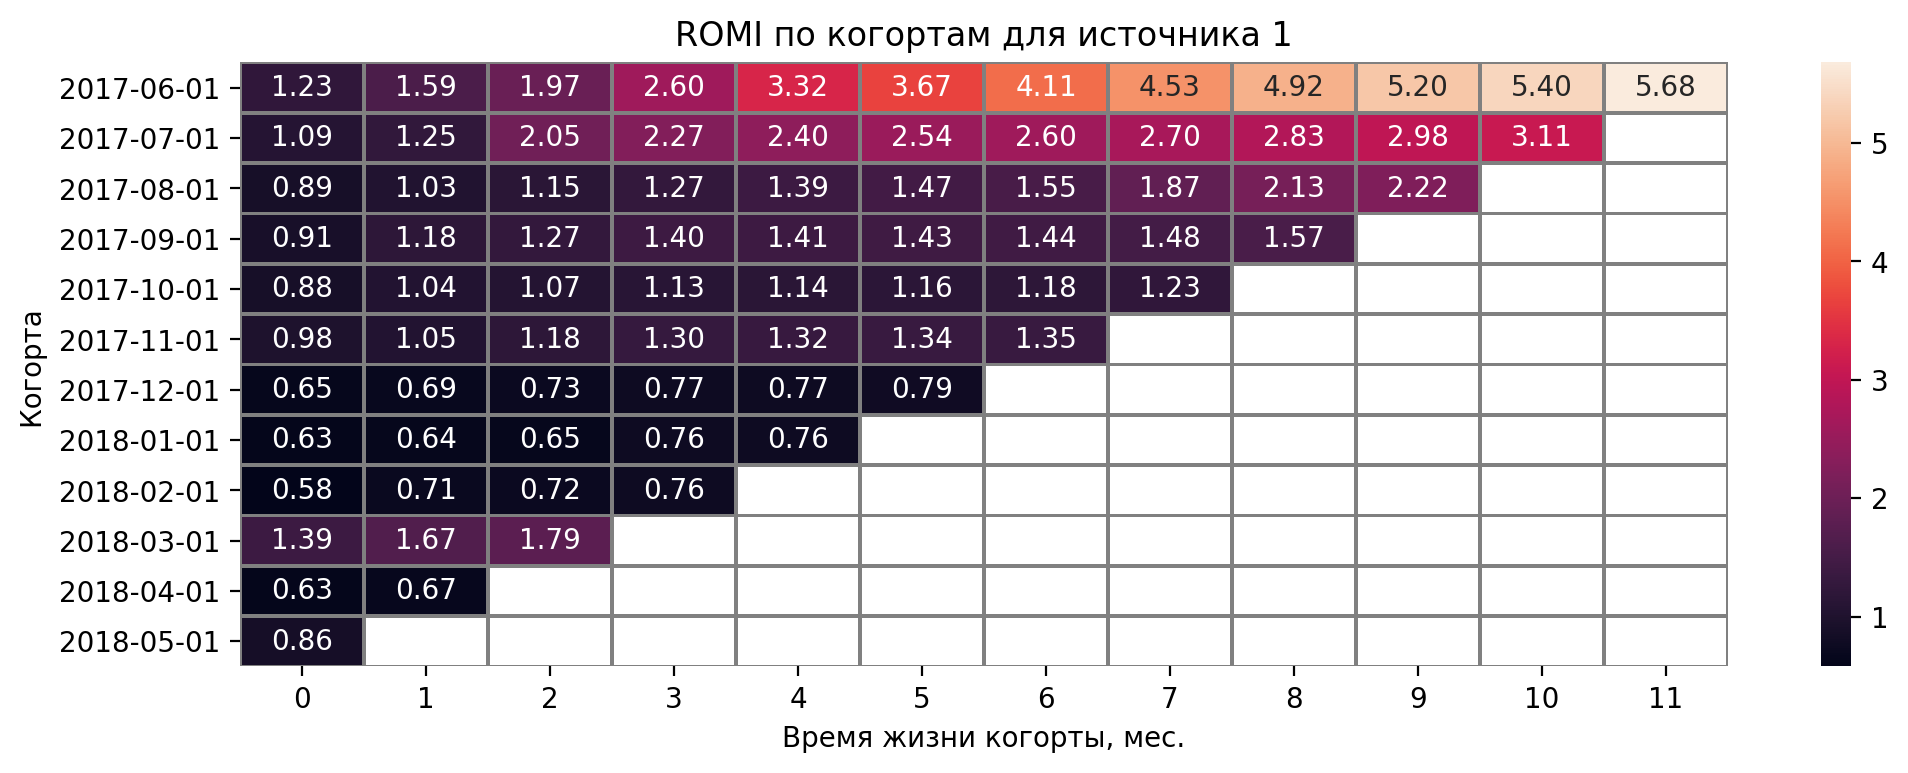

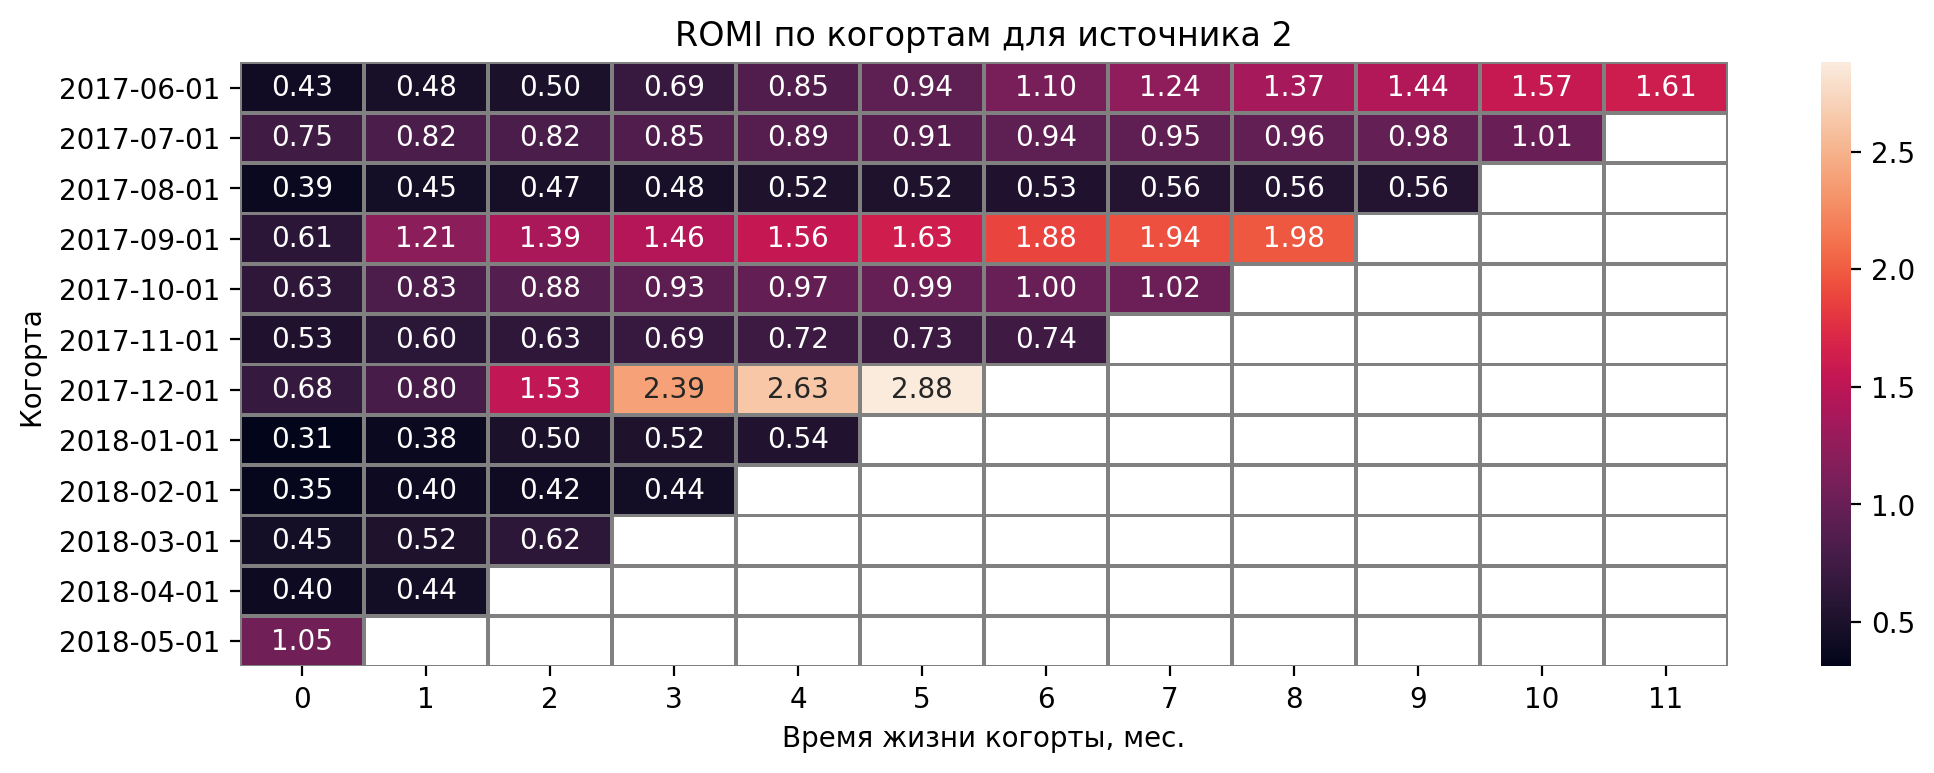

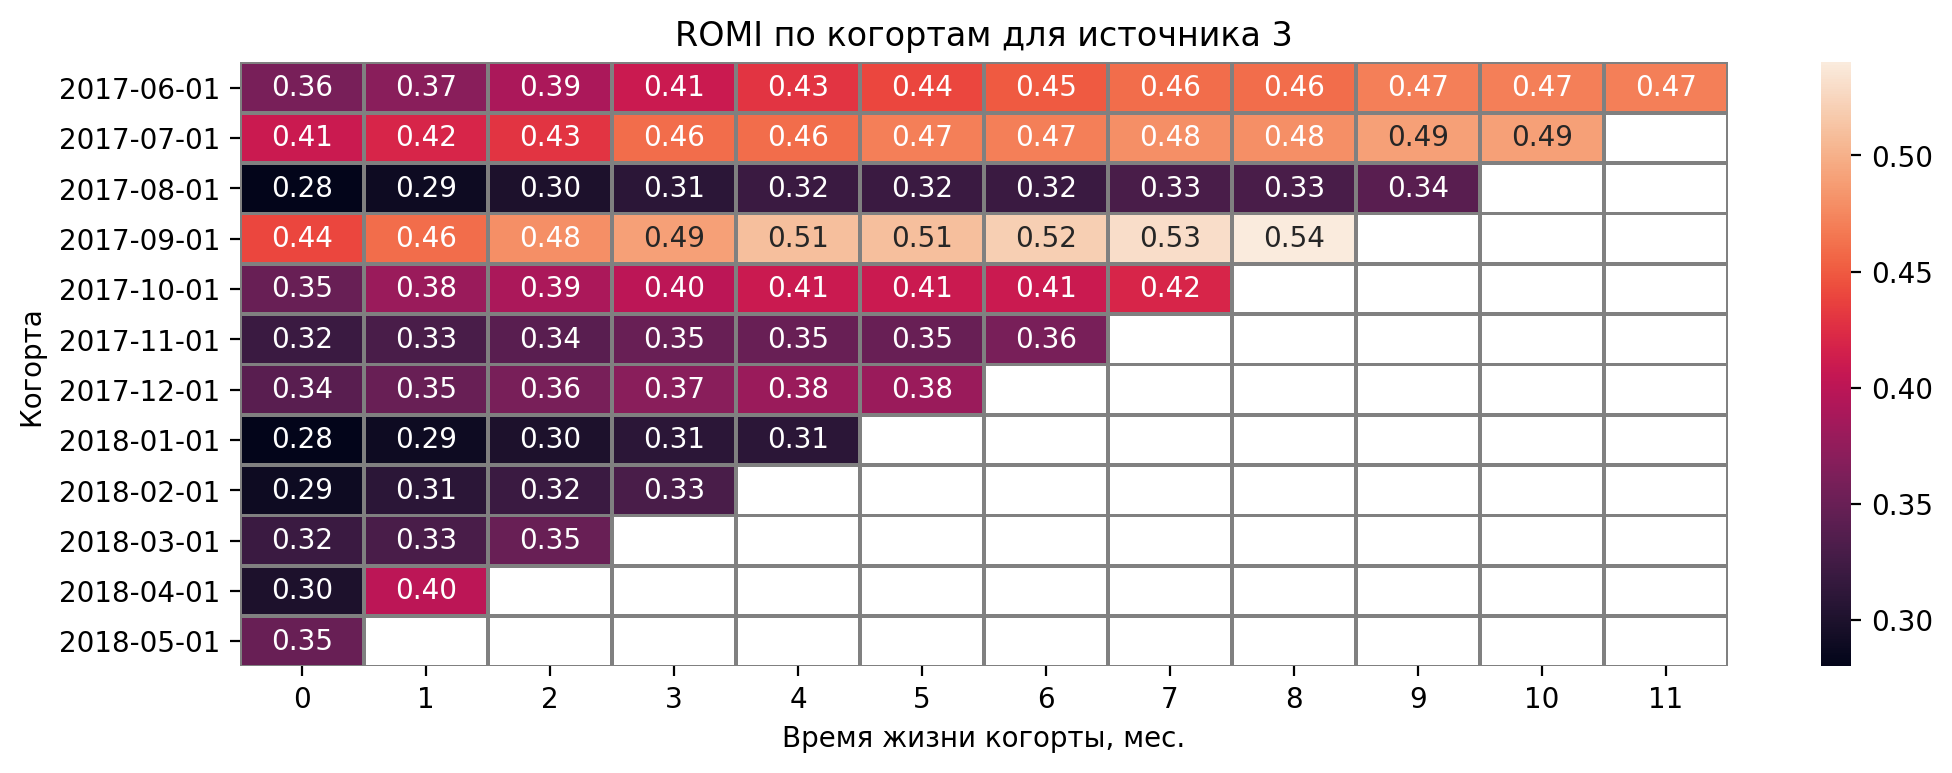

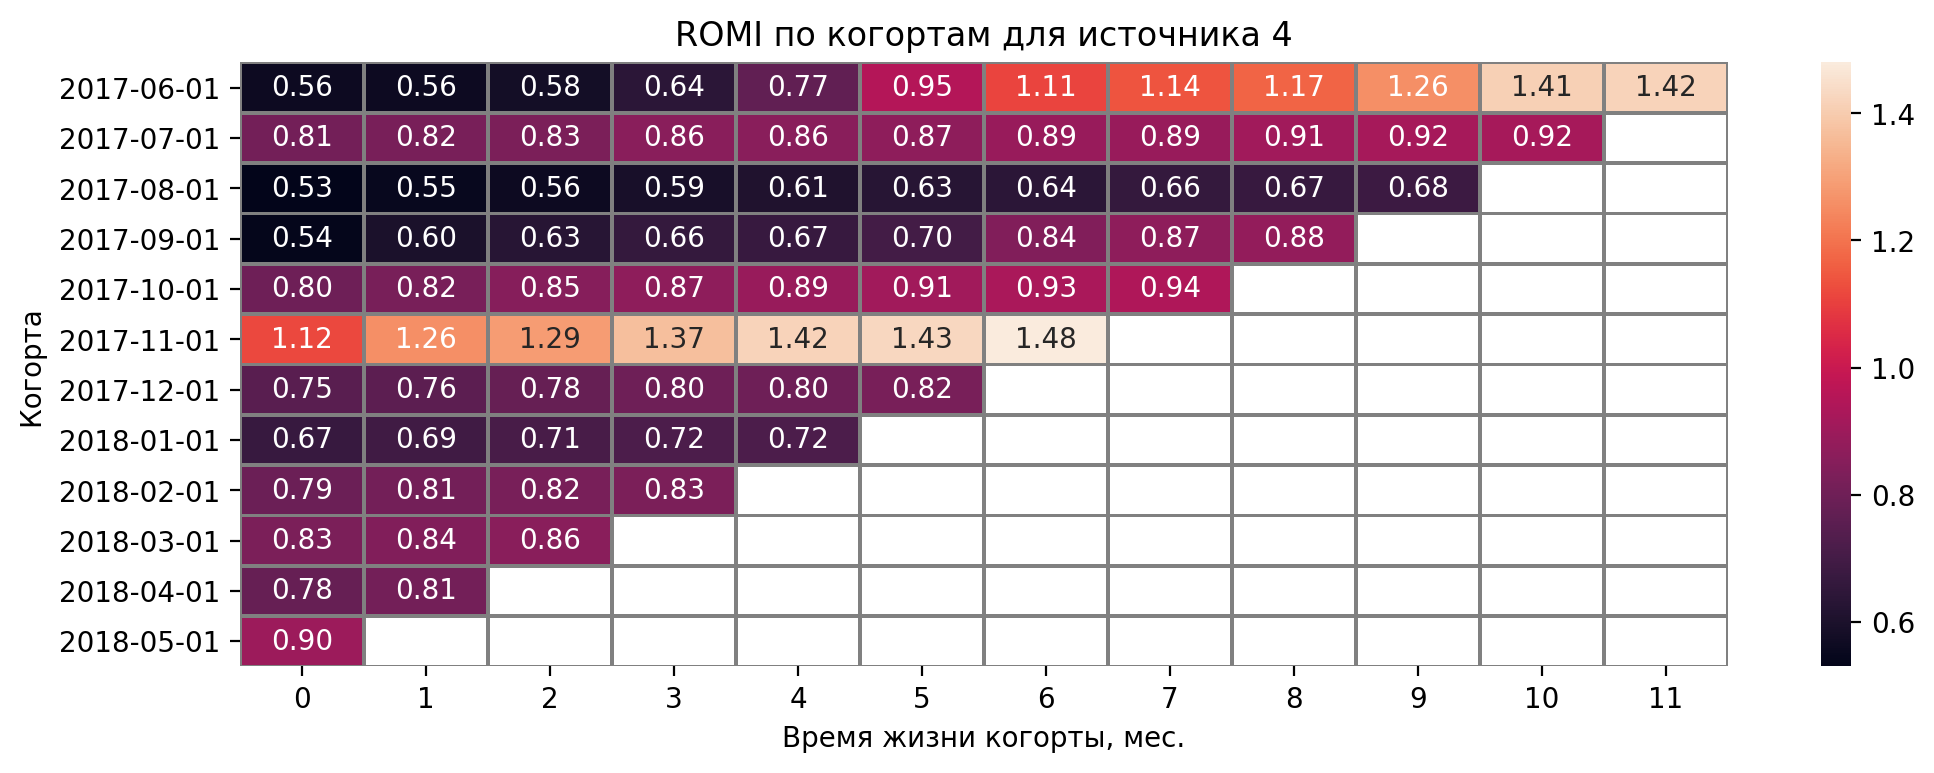

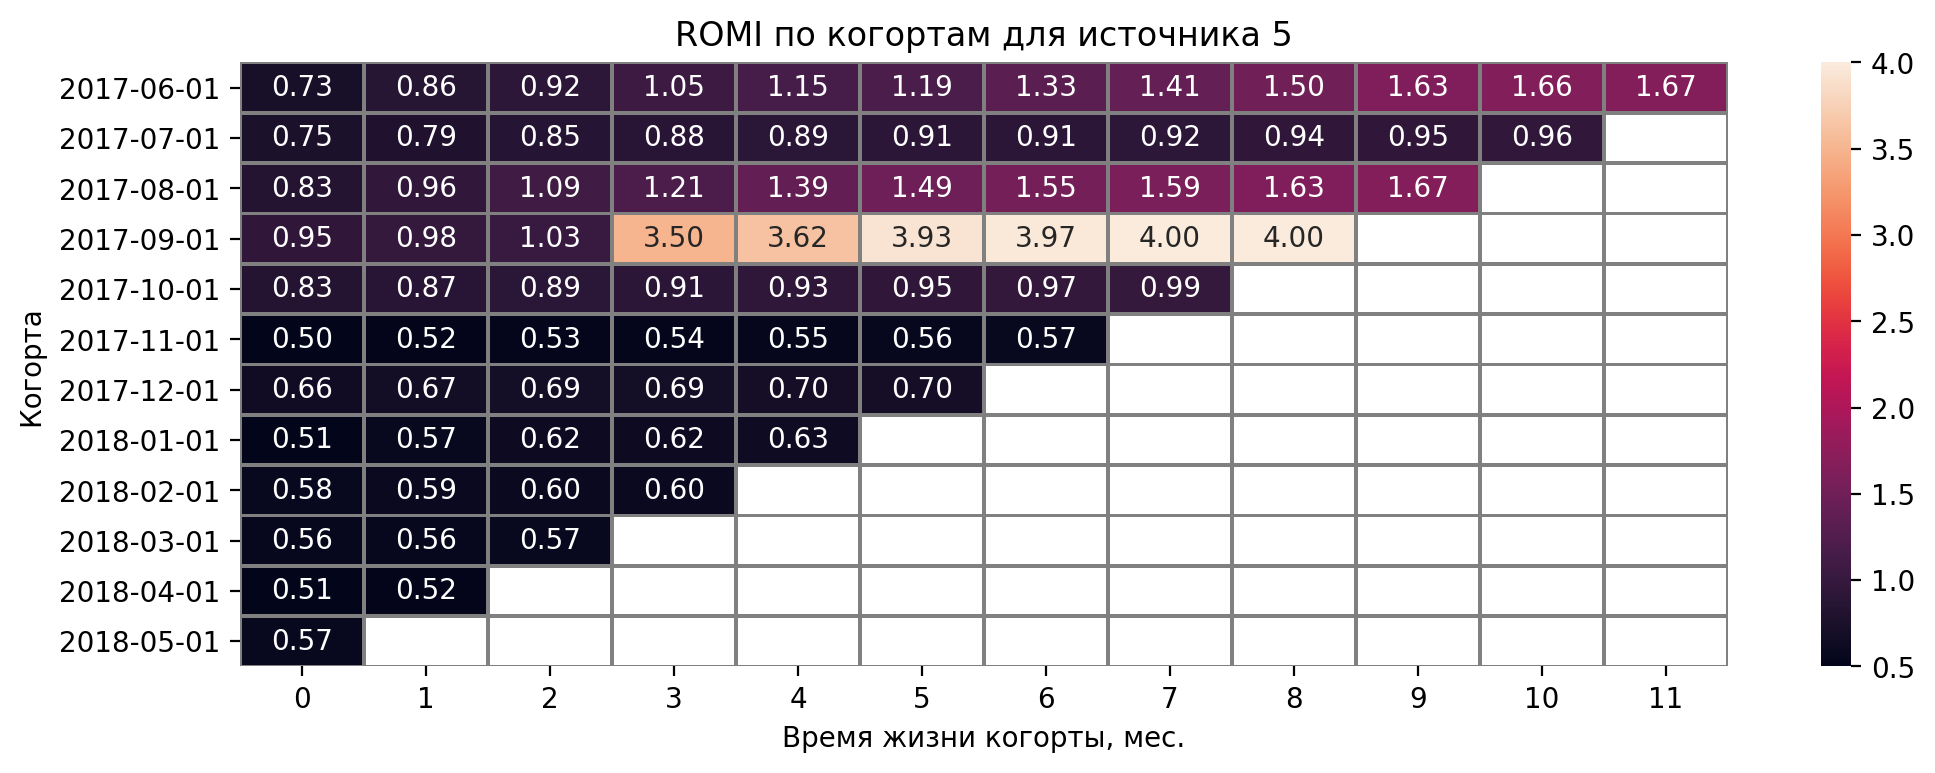

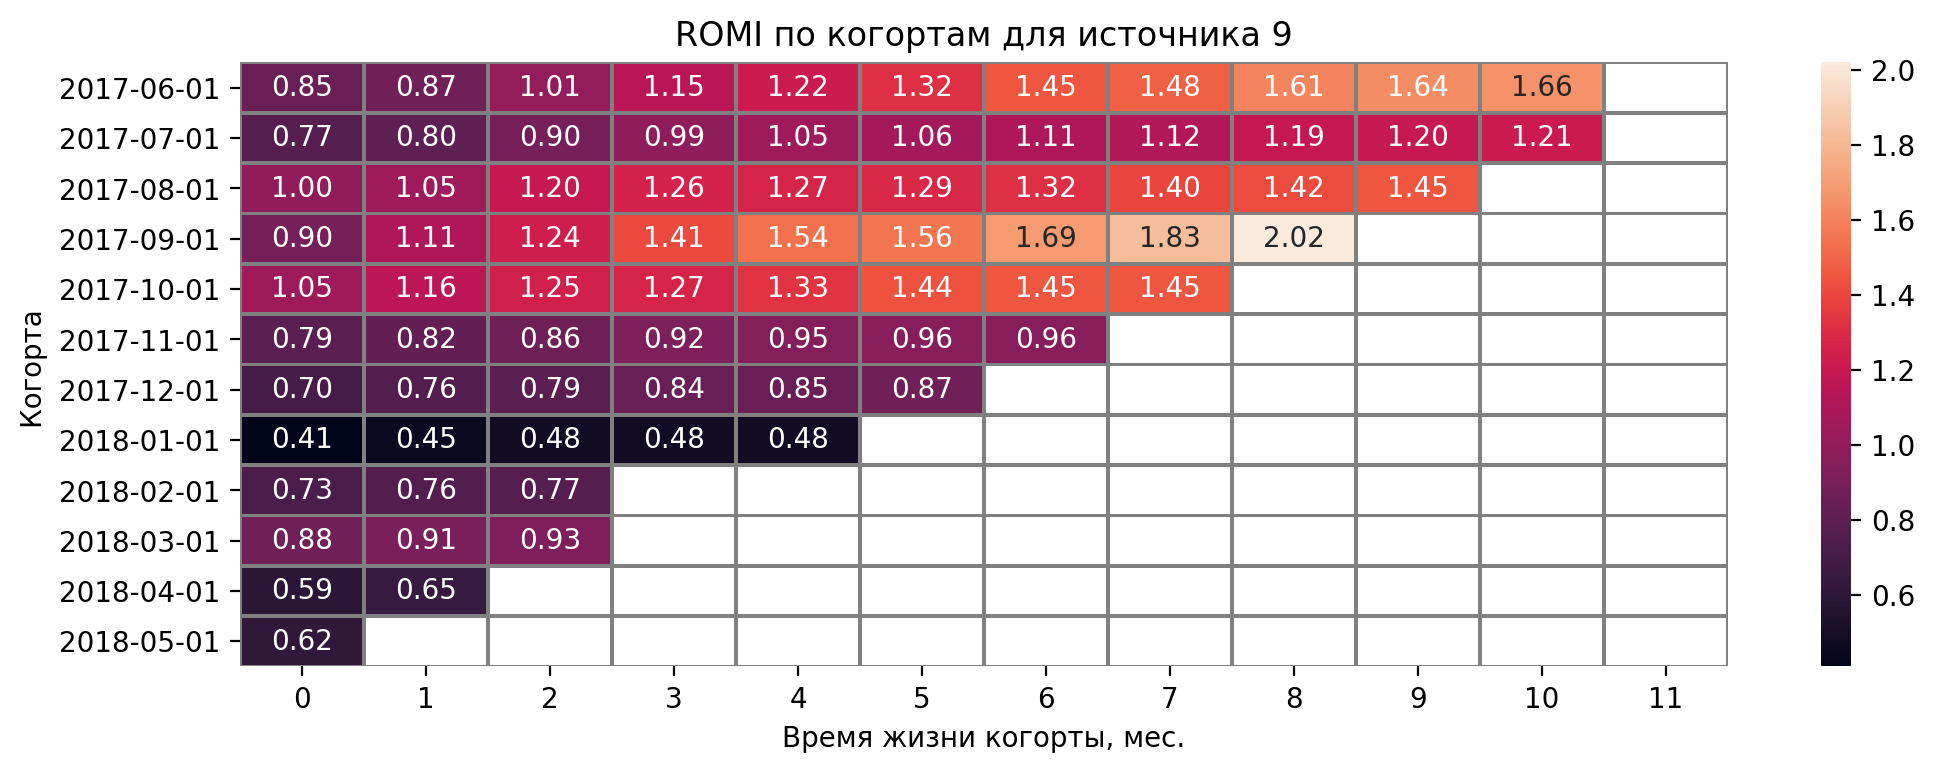

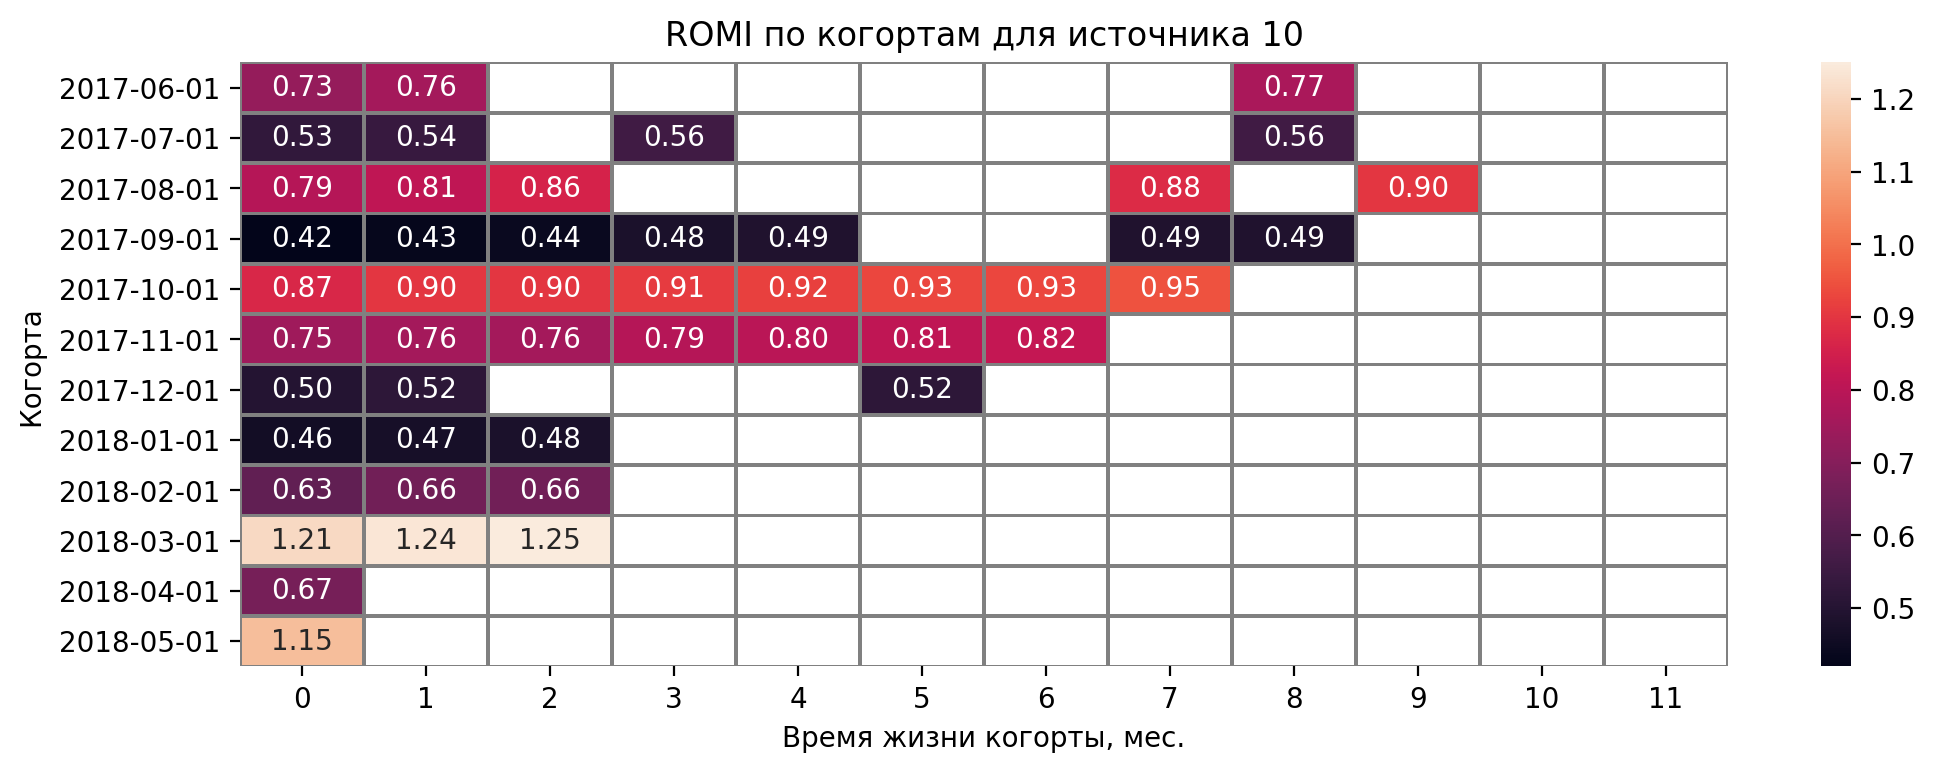

In [134]:
for num in source_num:
    cohort_plot_source(num)

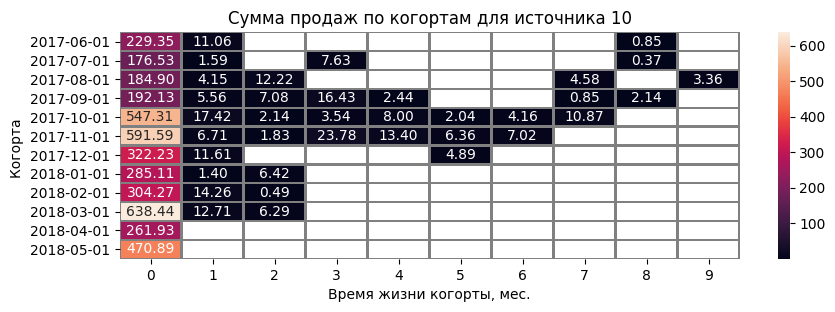

In [135]:
# проверка данных по источнику 10
data_source_ten = group_by_source[group_by_source['source_id'] == 10][['first_buy_m', 'lifetime', 'sum_buy', 'count_buy']]
gr_source_ten_sum = data_source_ten.pivot_table(index='first_buy_m', columns='lifetime', values='sum_buy')
plt.figure(figsize=(10,3), dpi=100)
sns.heatmap(gr_source_ten_sum, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Сумма продаж по когортам для источника 10')
plt.ylabel('Когорта ')
plt.xlabel('Время жизни когорты, мес.')
plt.show()

##### Пропуски на графике ROMI по когортам для источника 10 объясняются отсутствием продаж в данные периоды времени

In [136]:
# определим функция для вывода средней окупаемости (ROMI) для каждого источника за 6 месяцев
range_month=['2017-06-01', '2017-07-01','2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01']
def source_romi_six_month(num):
    plt.figure(figsize=(0.5, 0.5), dpi=100)
    sns.heatmap(report_romi.loc[(num, range_month), 5]
                .to_frame().mean().to_frame(),  cbar=False, cmap='hsv', annot=True, fmt='.2f')
    plt.title('Средняя окупаемость (ROMI) для источника %s за 6 месяцев' % num)
    plt.xticks(ticks=[], lable='')
    plt.yticks(ticks=[], lable='')
    plt.show()

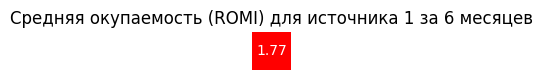

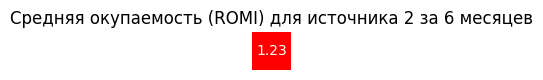

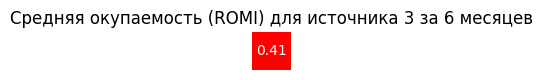

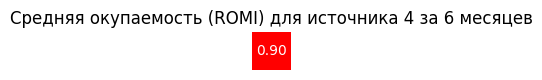

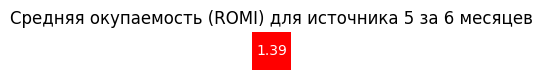

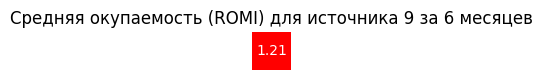

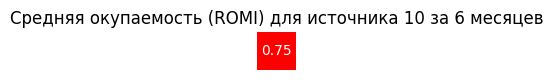

In [137]:
for num in source_num:
    source_romi_six_month(num)

#### Выводы по  2.3.3.  <a name='step_2.3.3v'></a>  
* Среднюю окупаемость больше 1.0 за 6 месяцев имеют источники 1, 2, 5 и 9  (наилучший показетель 1.77  у источника 1);
* Среднюю окупаемость меньше 1.0 за 6 месяцев имеют источники 3, 4 и 10 (наихудший показетель 0.41  у источника 3).

#### 2.3.4.  Анализ заказов пользователей в разрезе устройств и платформ  <a name='step_2.3.4'></a>

In [138]:
group_by_device_source = (df_o[df_o['lifetime'] == 0].groupby(['source_id', 'device', 'first_buy_m'])
                 .agg({'uid': 'nunique'}))
group_by_device_source = group_by_device_source.rename(columns={'uid': 'count_users_in_cohort'})
group_by_device_source.head()

count_users_in_cohort
source_id device  first_buy_m                       
1         desktop 2017-06-01                     163
                  2017-07-01                     138
                  2017-08-01                      94
                  2017-09-01                     181
                  2017-10-01                     272

In [139]:
# определим функцию для вывода графиков количества пользователей когорт по источникам и платформам
def plot_desktop_touch_users(num):
    ax=group_by_device_source.loc[(num, 'desktop'), :].plot(grid=True, figsize=(12,6))
    group_by_device_source.loc[(1, 'touch'), :].plot(grid=True, ax=ax)
    plt.legend(('desktop', 'touch'))
    plt.xlabel('')
    plt.ylabel('Количество покупателей, шт.')
    plt.title('Количество покупателей в когортах по платформам для источника %s' % num)
    plt.show()

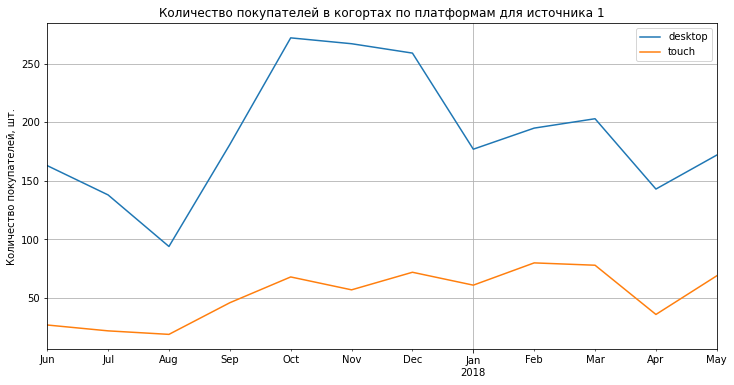

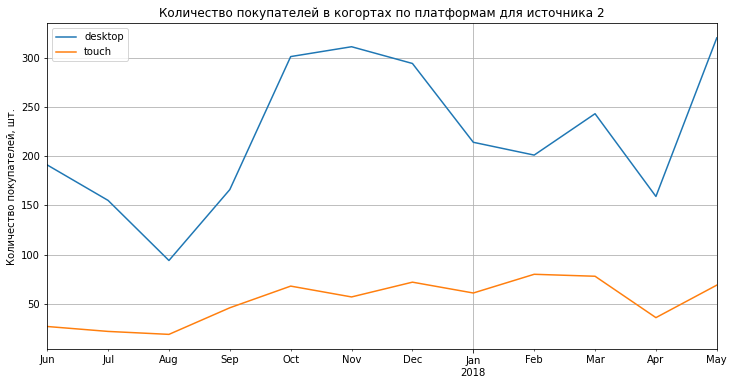

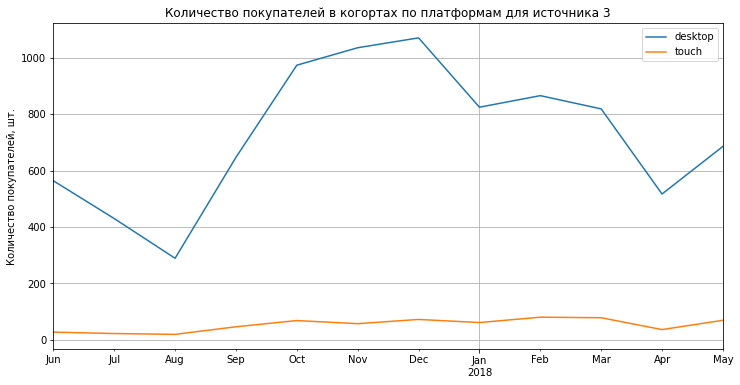

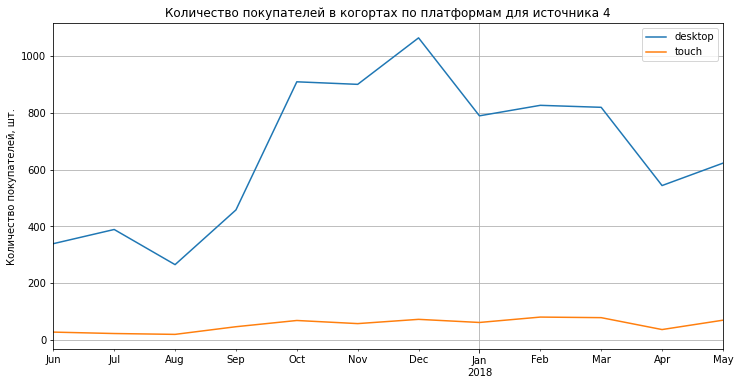

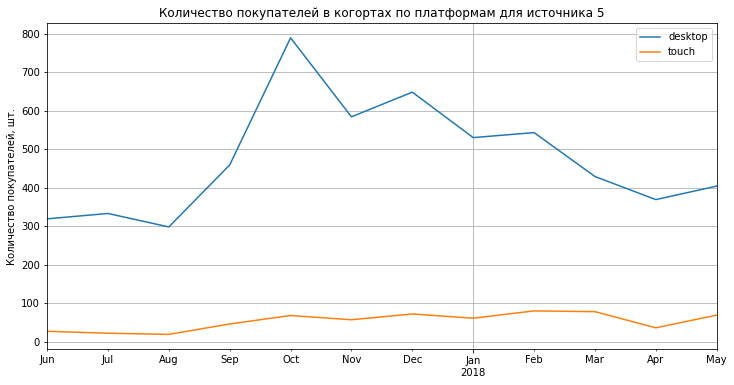

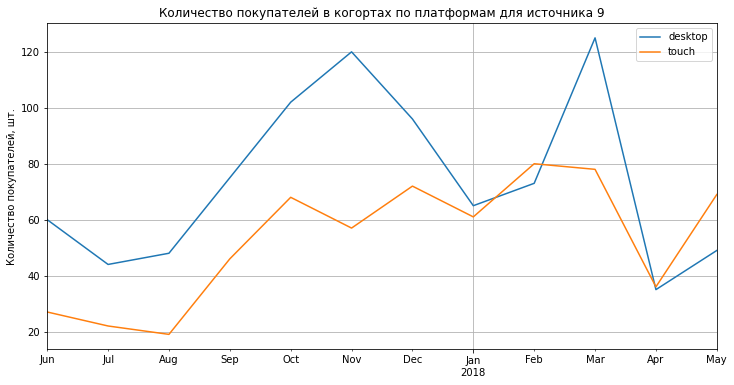

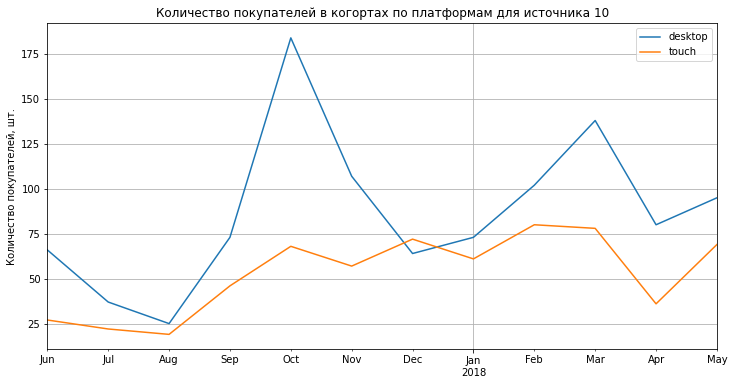

In [140]:
for num in source_num:
    plot_desktop_touch_users(num)

[Оглавление](#step_0)
## Общие выводы по исследованию <a name='step_fin'></a>

* Исследование показала, что наибольшее количество покупателей приносит desktop платформа, по сравнению с touch платформой. Данное превосходство наблюдается по всех источникам рекламы, при этом на источниках рекламы 9 и 10 в ряде месяцев показатели по количеству покупателей платформ сравниваются.  
* Что касается показателя ROMI в разрезе источников, то за 6 месяцев среднюю окупаемость больше 1.0 достигли источники 1, 2, 5 и 9 (у источника 1 - наилучший показетель 1.77 среди остальных), а  среднюю окупаемость меньше 1.0 за 6 месяцев имеют источники 3, 4 и 10 (у источника 3 наихудший показетель - 0.41). Маркетологам стоит обратить внимание на источник 3, поскольку он съедает большую часть бюджета и не дает возврата инвестиций.
* Маркетиновая метрика ROMI показалa, в разрезе источников рекламы, какие из них окупают вложенные инвестиции , а какие нет. На основании этой метрики необходимо пересмотреть рекламный бюджет с учетом указанных рекомендаций.
* Продуктовые метрики показали, что пользователи заходят на сайт в первый месяц своего обращения, а дальше возвращаемость очень низкая и продажи обеспечиваются за счет новых покупателей.
* Метрики электронной коммерции подтвердили значения продуктовых метрик о том, что пользователи сервиса осуществляют покупку в первый месяц, а дальнейшие покупки очень редки. При этом показатель среднего чека по мере увеличения возраста когорты растет. Т.е. общий объем продаж от старых покупателей очень низок, а средний чек одного покупателя растет (в сервисе остаются только самые "преданные").
* Когортный анализ покупателей показал, что по мере появления новых когорт покупателей их показатели снижаются, т.е. снижается средняя выручка с пользователя в первый месяц и угасание средней выручки с пользователя для новых когорт происходит быстрее. В связи с этим,  наиболее перспективными для компании являются старые когорты клиентов.
* В целом необходим  более глубокий анализ причин очень низкой возвращаемости клиентов, в связи с чем выручка формируется за счет новых покупателей. Таким образом,  в компании не наблюдается эффекта коммулятивного роста клиенской базы активных(покупающих) клиентов.